# Encoder Data analysis
Following running the behavriour-deserialisation.ipynb in the same, I now need a notebook that will allow me to input the path to the deserialised encoderdata.csv file and to reveal some understandable information

## ideas for analysis/questions I am interested in:

### General

- How many false licks are taken prior to licking at the correct landmark
    - Check how many separate landmarks are licked at prior to the correct one. For example, if landmarks B (9) and C (3) only have 2 landmarks licked at prior to the mice correctly identifying the rewarded landmark, then they have a better idea of where they are in the schema than if they had sampled 5 locations, some of which would in turn then be landmarks rewarded at a different time.
    - How many false licks are taken per trial at the start vs end of the session
    - How many false licks are taken in the 1st session of a new pattern vs when mice are experts
- Add these at bottom
- How many locations visited prior to the correct landmarks (not considering licks there)
- Time spent at each state (on B searching for C, or D searching for A per se)
- Time spent at location X after being rewarded at location X
    - A short time would suggest that movement may be what mouse thinks is being rewarded (Grid3C = important)
    - A long time would suggest understanding that given position in 2D space is what is being rewarded (Grid3C = less important)
- Mean trial duration during and throughout a session
- Mean trial duration as an average across sessions


## Step 1 - What files am I analysing
I will give the following cell 4 paths: 
- session.yaml file : This will tell me what mmouse, grid, settings etc. were used for the data set I'm going to analyse.
- AllHarpEvents.csv file : This should give me all relevent solenoid, lick spout, audio cue data. Any HARP behavioural information.
- Joystick.csv :  This will give me more detailed rotary encoder information.  
- LickEvents.csv : This will give me the TRUE lick events timestamped during the session
 
All of the files will be saved in a folder like this 'ses-001_date-20250908T142804' from the same path i.e 'Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\ML_165\bestsessions\ses-001_date-20250908T142804'.
What do I need to put into the following cell of my visual studio code notebook?

- I used to use, but no longer do:  Behaviour.harp[date].bin : This will give me more detailed rotary encoder information.  

Check How many Lick Events files there are

In [ ]:
# ------------------------------------------
# 🧩 1️⃣ CONCATENATE (OR PROCESS SINGLE) LICK EVENT FILES
# ------------------------------------------
import pandas as pd
from pathlib import Path
from datetime import datetime

# Base session folder
session_path = Path(r"Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_004\bestsessions\ses-001_date-20251125T140513"
"")

lick_folder = session_path / "LickEvents"

# Find all lick CSVs
lick_files = sorted(
    lick_folder.glob("LickEvents*.csv"),
    key=lambda x: datetime.strptime(
        x.stem.replace("LickEvents", ""),  # remove prefix
        "%Y-%m-%dT%H_%M_%S"                 # match filename pattern
    )
)

# Load all lick files
dataframes = [pd.read_csv(f) for f in lick_files]

# ✅ Handle both single-file and multi-file cases the same way
if len(dataframes) == 0:
    raise FileNotFoundError("❌ No lick event CSV files found in folder!")



# Concatenate if multiple, or just use the single dataframe
if len(dataframes) > 1:
    concatenated_lick_df = pd.concat(dataframes, ignore_index=True)
    print(f"✅ Concatenated {len(lick_files)} files.")
else:
    concatenated_lick_df = dataframes[0].copy()
    print(f"✅ Only one lick file found: {lick_files[0].name}")


# ✅ Keep a copy of the original Seconds column
concatenated_lick_df['Seconds_Original'] = concatenated_lick_df['Seconds']

# ✅ Normalize time so it starts at 0 (for internal analysis)
concatenated_lick_df['Seconds'] -= concatenated_lick_df['Seconds'].min()

# ✅ Sort by normalized time just to be safe
concatenated_lick_df = concatenated_lick_df.sort_values('Seconds', ignore_index=True)


# ✅ Save to same directory with consistent naming
concatenated_csv_path = lick_folder / "Concatenated_Lick.csv"
concatenated_lick_df.to_csv(concatenated_csv_path, index=False)
print(f"✅ Processed lick data saved to {concatenated_csv_path}")

✅ Concatenated 2 files.
✅ Processed lick data saved to Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\LickEvents\Concatenated_Lick.csv


In [ ]:
# Fix Step 1 - Correct YAML filename formatting

from pathlib import Path

# Extract Mouse ID and Date
mouse_id_folder = session_path.parent.parent.name  # e.g. "ML_165"
mouse_id = mouse_id_folder.replace("_", "")        # -> "ML165"
date_str = session_path.name.split("_date-")[-1][:8]  # e.g. "20250908"

# Input files
session_yaml = session_path / f"Session_{date_str}_{mouse_id}.yml"
#behaviour_bin = next((session_path / "Behavior.harp").glob("Behavior.harp*.bin"))
behaviour_csv = next((session_path / "Joystick").glob("Joystick*.csv"))
harp_events_csv = session_path / "Deserialised" / "AllHarpEvents.csv"
lick_events_csv = next((session_path / "LickEvents").glob("Concatenated_Lick.csv"))

print("Session YAML:      ", session_yaml)
print("Behaviour BIN:     ", behaviour_csv)
print("Harp Events CSV:   ", harp_events_csv)
print("Lick Events CSV:   ", lick_events_csv)




Session YAML:       Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\Session_20251103_JK008.yml
Behaviour BIN:      Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\Joystick\Joystick2025-11-03T13_37_33.csv
Harp Events CSV:    Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\Deserialised\AllHarpEvents.csv
Lick Events CSV:    Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\LickEvents\Concatenated_Lick.csv


## Step 2 – Load the files so you can start exploring the contents of each one.

Lets load these files:
- YAML → Use pyyaml to load as a Python dictionary.
- CSV → Use pandas to load as a DataFrame.
- BIN fille below no longer exists as I have converted it to CSV file 
- BIN → These HARP .bin files usually store timestamped events or encoder data. Without the full spec we’ll load the raw bytes now, and later we can decode according to the HARP format. 

Lets also extract the revelant columns: 
- I now want to parse out 3 columns from the Behaviour_csv file. 
    - These are called 'Seconds', 'Value.JoystickPositionX' and 'Value.JoystickPositionY'. 
- and 3 columns from the harp_events_csv file, called: 
    - 'Time', 'OutputSet_DO2' and 'TimestampSeconds_TimestampSeconds'. 
- and 2 columns from the lick_events_csv
    - 'Seconds' and 'Value.LickDetected'

In [ ]:
# Step 2 - Load session.yaml, AllHarpEvents.csv, Behaviour CSV and the session_grid.yaml
 
import yaml
import pandas as pd

# --- Load YAML (session metadata)
with open(session_yaml, "r") as f:
    session_metadata = yaml.safe_load(f)

print("✅ YAML loaded with keys:", list(session_metadata.keys()))
print()
print("First lines of session YAML file:")
with open(session_yaml, "r") as f:
    for i in range(10):
        line = f.readline()
        if not line:
            break
        print(line.rstrip())
print()

# --- Extract grid name from landmarksPath
landmarks_path = session_metadata["paths"]["landmarksPath"]
session_grid = landmarks_path.split("/")[-1].replace(".yml", "")
print(f"Session grid name: {session_grid}")
print()

# --- Within the key landmarks, I want you to create a new variable called jitter with the value for jitter
jitter_value = session_metadata.get("landmarks", {}).get("jitter", None)
print(f"Jitter value: {jitter_value}")
print()

# --- Load HARP events CSV and select relevant columns
harp_columns = ["OutputSet_Time", "OutputSet_DO2", "TimestampSeconds_TimestampSeconds"]

harp_events = pd.read_csv(harp_events_csv, usecols=harp_columns)
print(f"✅ HARP events CSV loaded with shape: {harp_events.shape}")
print("Columns:", harp_events.columns.tolist())
print()
display(harp_events.head())

# --- Load Behaviour CSV and select relevant columns
behaviour_columns = ["Seconds", "Value.JoystickPositionX", "Value.JoystickPositionY"]

behaviour_df = pd.read_csv(behaviour_csv, usecols=behaviour_columns)
print(f"✅ Behaviour CSV loaded with shape: {behaviour_df.shape}")
print("Columns:", behaviour_df.columns.tolist())
print()
display(behaviour_df.head())

# --- Load Lick events CSV and select relevant columns
lick_columns = ["Seconds", "Value.LickDetected", "Seconds_Original"]

lick_events_df = pd.read_csv(lick_events_csv, usecols=lick_columns)
print(f"✅ Lick events CSV loaded with shape: {lick_events_df.shape}")
print("Columns:", lick_events_df.columns.tolist())
print()
display(lick_events_df.head())



✅ YAML loaded with keys: ['subjectID', 'sessionID', 'audioCueActive', 'numberOfTrials', 'ITISeconds', 'rewardProbability', 'landmarks', 'paths', 'flags']

First lines of session YAML file:
# yaml-language-server: $schema=./Session.json
subjectID: JK008
sessionID: "001"
audioCueActive: True
numberOfTrials: 100
ITISeconds: 0.1
rewardProbability: 1.0
landmarks:
  mapping:
    A: "1"

Session grid name: newgrid3c-6715

Jitter value: 1.2

✅ HARP events CSV loaded with shape: (2120478, 3)
Columns: ['OutputSet_Time', 'OutputSet_DO2', 'TimestampSeconds_TimestampSeconds']



C:\Users\jessek\AppData\Local\Temp\ipykernel_19392\735966873.py:35: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  harp_events = pd.read_csv(harp_events_csv, usecols=harp_columns)


,OutputSet_Time,OutputSet_DO2,TimestampSeconds_TimestampSeconds
0,3.845022e+09,True,3.845022e+09
1,3.845022e+09,True,3.845022e+09
2,3.845022e+09,True,3.845022e+09
3,3.845022e+09,True,3.845022e+09
4,3.845022e+09,True,3.845022e+09


✅ Behaviour CSV loaded with shape: (23980, 3)
Columns: ['Seconds', 'Value.JoystickPositionX', 'Value.JoystickPositionY']



,Seconds,Value.JoystickPositionX,Value.JoystickPositionY
0,3.845022e+09,-0.651948,57.881153
1,3.845022e+09,-0.714034,57.880405
2,3.845022e+09,-0.776120,57.879589
3,3.845022e+09,-0.900286,57.877750
4,3.845022e+09,-0.869201,57.902737


✅ Lick events CSV loaded with shape: (1772, 3)
Columns: ['Seconds', 'Value.LickDetected', 'Seconds_Original']



,Seconds,Value.LickDetected,Seconds_Original
0,0.000000,True,3.845022e+09
1,0.101984,False,3.845022e+09
2,0.760992,True,3.845022e+09
3,0.864000,False,3.845022e+09
4,1.885984,True,3.845022e+09


## Step 3 - Confirm rewarded landmark coordinates

In [ ]:
from pathlib import Path
import yaml

# Load YAML
session_landmarks_yaml_dir = Path(r"Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\joystick_grid_ymls")
landmarks_yaml = session_landmarks_yaml_dir / f"{session_grid}.yml"

with open(landmarks_yaml, "r") as f:
    landmarks_data = yaml.safe_load(f)

positions = landmarks_data["positions"]
'''
# 1-9 Save landmarks (include both number and coordinates)
landmark_A = {"number": 1, "coords": (positions[1]["x"], positions[1]["y"])}
landmark_B = {"number": 2, "coords": (positions[2]["x"], positions[2]["y"])}
landmark_C = {"number": 3, "coords": (positions[3]["x"], positions[3]["y"])}
landmark_D = {"number": 4, "coords": (positions[4]["x"], positions[4]["y"])}
landmark_E = {"number": 5, "coords": (positions[5]["x"], positions[5]["y"])}
landmark_F = {"number": 6, "coords": (positions[6]["x"], positions[6]["y"])}
landmark_G = {"number": 7, "coords": (positions[7]["x"], positions[7]["y"])}
landmark_H = {"number": 8, "coords": (positions[8]["x"], positions[8]["y"])}
landmark_I = {"number": 9, "coords": (positions[9]["x"], positions[9]["y"])}
'''

# 1938 Save landmarks (include both number and coordinates)
landmark_A = {"number": 1, "coords": (positions[1]["x"], positions[1]["y"])}
landmark_B = {"number": 9, "coords": (positions[2]["x"], positions[2]["y"])}
landmark_C = {"number": 3, "coords": (positions[3]["x"], positions[3]["y"])}
landmark_D = {"number": 8, "coords": (positions[4]["x"], positions[4]["y"])}


'''
# 2594 Save landmarks (include both number and coordinates)
landmark_A = {"number": 2, "coords": (positions[1]["x"], positions[1]["y"])}
landmark_B = {"number": 5, "coords": (positions[2]["x"], positions[2]["y"])}
landmark_C = {"number": 9, "coords": (positions[3]["x"], positions[3]["y"])}
landmark_D = {"number": 4, "coords": (positions[4]["x"], positions[4]["y"])}


# 6715 Save landmarks (include both number and coordinates)
landmark_A = {"number": 6, "coords": (positions[1]["x"], positions[1]["y"])}
landmark_B = {"number": 7, "coords": (positions[2]["x"], positions[2]["y"])}
landmark_C = {"number": 1, "coords": (positions[3]["x"], positions[3]["y"])}
landmark_D = {"number": 5, "coords": (positions[4]["x"], positions[4]["y"])}
'''

# Group them for convenience (4)
landmarks = {
    "A": landmark_A,
    "B": landmark_B,
    "C": landmark_C,
    "D": landmark_D,
}
'''
# Group them for convenience (9)
landmarks = {
    "A": landmark_A,
    "B": landmark_B,
    "C": landmark_C,
    "D": landmark_D,
    "E": landmark_E,
    "F": landmark_F,
    "G": landmark_G,
    "H": landmark_H,
    "I": landmark_I,
}
'''
# Print to check
for label, data in landmarks.items():
    print(f"Landmark {label}: Number {data['number']}, Coordinates {data['coords']}")


Landmark A: Number 6, Coordinates (-4.560754051208496, 57.101125061035155)
Landmark B: Number 7, Coordinates (3.529754051208496, 60.01851125061035)
Landmark C: Number 1, Coordinates (3.529754051208496, 53.851125061035155)
Landmark D: Number 5, Coordinates (-0.726354051208496, 57.101125061035155)


## Preliminary Summary Information

### Step 4.1 View Number and TimeStamps of reward deliveries
Cross reference the number recorded in my Joystick notebook to ensure the whole session is being read in the AllHarpEvents.csv file


In [ ]:
# In the AllHarpEvents.csv, the "OutputSet_DO2" column indicates solenoid valve events.
# Show me all the timestamps where OutputSet_DO2 is True (valve opened). 

solenoid_events = harp_events[harp_events["OutputSet_DO2"] == True]
print(f"Found {solenoid_events.shape[0]} solenoid valve events (OutputSet_DO2 == True)")
display(solenoid_events)



Found 43 solenoid valve events (OutputSet_DO2 == True)


,OutputSet_Time,OutputSet_DO2,TimestampSeconds_TimestampSeconds
0,3.845022e+09,True,3.845022e+09
1,3.845022e+09,True,3.845022e+09
2,3.845022e+09,True,3.845022e+09
3,3.845022e+09,True,3.845022e+09
4,3.845022e+09,True,3.845022e+09
5,3.845022e+09,True,3.845022e+09
6,3.845022e+09,True,3.845022e+09
7,3.845022e+09,True,3.845022e+09
8,3.845022e+09,True,3.845022e+09
9,3.845023e+09,True,3.845022e+09


## Step 4.2 - Mean trial duration time through session
This calculates how long it took to get rewarded at landmarks A->A, and plots a histogram of trial duration within session. This will gives a mean session trial duration too and put this in the title.

Mean trial duration (A->A): 188.311 seconds


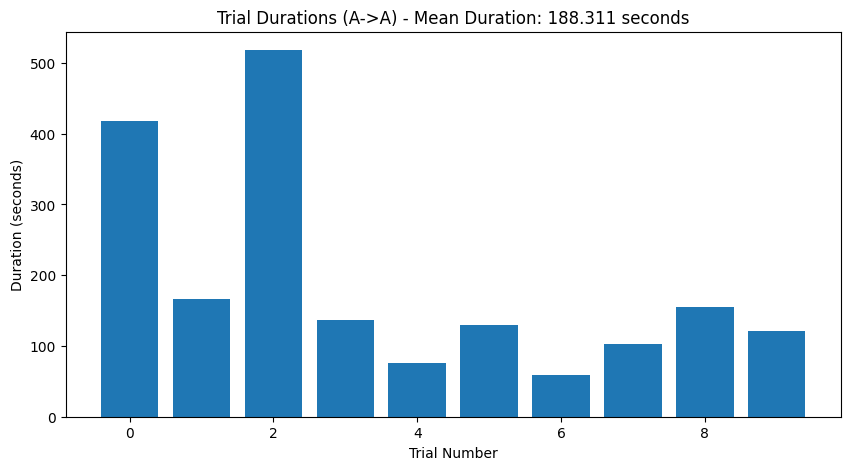

In [ ]:
# One trial consists of 4 x OutputSet_DO2 True events (4 valve openings)
# Each trial corresponds to a segment between two landmarks
# Taking the solenoid_events, plot the mean trial duration taking a trial duration as the time between the first and fifth valve opening, fifth and ninth, ninth and thirteenth etc.
import numpy as np
trial_durations = []
num_events = solenoid_events.shape[0]
for i in range(0, num_events - 4, 4):
    start_time = solenoid_events.iloc[i]["OutputSet_Time"]
    end_time = solenoid_events.iloc[i + 4]["OutputSet_Time"]
    duration = end_time - start_time
    trial_durations.append(duration)
mean_duration = np.mean(trial_durations)
print(f"Mean trial duration (A->A): {mean_duration:.3f} seconds")

#Plot histogram of trial durations with the trial number on x axis and duration on y axis
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(range(len(trial_durations)), trial_durations)
plt.xlabel("Trial Number")
plt.ylabel("Duration (seconds)")
plt.title("Trial Durations (A->A) - Mean Duration: {:.3f} seconds".format(mean_duration))
#plt.show()
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
plt.savefig(plots_path / f"{mouse_id}_{date_str}_TrialDurations.png")


In [ ]:
'''
# One trial consists of 4 x OutputSet_DO2 True events (4 valve openings)
# Each trial corresponds to a segment between two landmarks
# Taking the solenoid_events, plot the mean trial duration taking a trial duration as the time between the first and fifth valve opening, fifth and ninth, ninth and thirteenth etc.
import numpy as np
trial_durations = []
for i in range(0, len(solenoid_events), 4):
    if i + 3 < len(solenoid_events):
        start_time = solenoid_events.iloc[i]["OutputSet_Time"]
        end_time = solenoid_events.iloc[i + 3]["OutputSet_Time"]
        duration = end_time - start_time
        trial_durations.append(duration)
mean_duration = np.mean(trial_durations)
print(f"Mean trial duration (4 valve openings): {mean_duration:.3f} seconds")

#Plot histogram of trial durations with the trial number on x axis and duration on y axis
#Add a red line for the mean duration for each trial
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.xlabel("Trial Number")
plt.ylabel("Trial Duration (seconds)")
plt.title("Trial Durations (4 Valve Openings)")
plt.show()
'''


'\n# One trial consists of 4 x OutputSet_DO2 True events (4 valve openings)\n# Each trial corresponds to a segment between two landmarks\n# Taking the solenoid_events, plot the mean trial duration taking a trial duration as the time between the first and fifth valve opening, fifth and ninth, ninth and thirteenth etc.\nimport numpy as np\ntrial_durations = []\nfor i in range(0, len(solenoid_events), 4):\n    if i + 3 < len(solenoid_events):\n        start_time = solenoid_events.iloc[i]["OutputSet_Time"]\n        end_time = solenoid_events.iloc[i + 3]["OutputSet_Time"]\n        duration = end_time - start_time\n        trial_durations.append(duration)\nmean_duration = np.mean(trial_durations)\nprint(f"Mean trial duration (4 valve openings): {mean_duration:.3f} seconds")\n\n#Plot histogram of trial durations with the trial number on x axis and duration on y axis\n#Add a red line for the mean duration for each trial\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10, 5))\nplt.xlabel(

## Step 4.3 - Total distance covered in the session
This calculates the total distance travelled in the sesion in mm based on the sum of distance between each rotary encoder row.

## Step 4.4 - Total licks per session and duration of licks per session
Doesn't give anything but just shows that this is being read correctly

In [ ]:
import numpy as np

## Count the number of licks detected in the lick_events_df dataframe where 'Value.LickDetected' is True
num_licks = lick_events_df[lick_events_df["Value.LickDetected"] == True].shape[0]
print(f"Total number of licks detected in session: {num_licks}")

## Count the mean duration of licks detected in the lick_events_df dataframe where 'Value.LickDetected' is True
## Consider the time between the first 'True' and the next 'False' as the duration of a lick
lick_durations = []
in_lick = False
lick_start_time = None

for index, row in lick_events_df.iterrows():
    if row["Value.LickDetected"] == True and not in_lick:
        in_lick = True
        lick_start_time = row["Seconds_Original"]
    elif row["Value.LickDetected"] == False and in_lick:
        in_lick = False
        lick_end_time = row["Seconds_Original"]
        lick_duration = lick_end_time - lick_start_time
        lick_durations.append(lick_duration)
mean_lick_duration = np.mean(lick_durations) if lick_durations else 0.0
print(f"Mean lick duration: {mean_lick_duration:.3f} seconds")


## Make a new lick_time_df which gives all of the timestamps where 'Value.LickDetected' is True
lick_time_df = lick_events_df[lick_events_df["Value.LickDetected"] == True]
print(f"Lick time dataframe shape: {lick_time_df.shape}")
display(lick_time_df.head(50))


Total number of licks detected in session: 886
Mean lick duration: 0.125 seconds
Lick time dataframe shape: (886, 3)


,Seconds,Value.LickDetected,Seconds_Original
0,0.000000,True,3.845022e+09
2,0.760992,True,3.845022e+09
4,1.885984,True,3.845022e+09
6,9.062976,True,3.845022e+09
8,11.312000,True,3.845022e+09
10,12.040992,True,3.845022e+09
12,12.437984,True,3.845022e+09
14,18.422976,True,3.845022e+09
16,18.884992,True,3.845022e+09
18,48.821984,True,3.845022e+09


## Step 4.5 - Licks per trial
count licks per trial

In [ ]:
# --- Extract solenoid onset times (OutputSet_DO2 == True)
solenoid_onsets = solenoid_events["OutputSet_Time"].values
num_events = len(solenoid_onsets)

# --- Store results
lick_counts = []
trial_durations = []

for i in range(0, num_events - 4, 4):

    # Define trial start and end
    start_time = solenoid_onsets[i]
    end_time   = solenoid_onsets[i + 4]

    # Trial duration
    trial_durations.append(end_time - start_time)

    # Count licks in this window
    lick_count = (
        lick_time_df[
#           (lick_time_df["Seconds"] >= start_time) &
#            (lick_time_df["Seconds"] < end_time)
            (lick_time_df["Seconds_Original"] >= start_time) &
            (lick_time_df["Seconds_Original"] < end_time)
        ].shape[0]
    )
    lick_counts.append(lick_count)

# Summary
mean_licks = np.mean(lick_counts)
print(f"Found {len(lick_counts)} trials.")
print(f"Mean licks per trial: {mean_licks:.2f}")
#print(i, start_time, end_time, lick_count)
print(lick_time_df.head())


Found 10 trials.
Mean licks per trial: 81.80
     Seconds  Value.LickDetected  Seconds_Original
0   0.000000                True      3.845022e+09
2   0.760992                True      3.845022e+09
4   1.885984                True      3.845022e+09
6   9.062976                True      3.845022e+09
8  11.312000                True      3.845022e+09


plot licks per trial

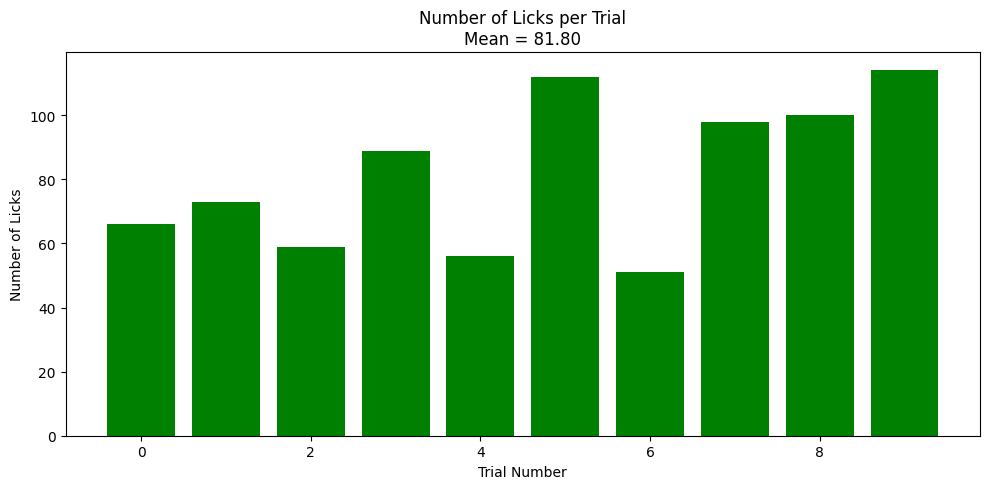

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(lick_counts)), lick_counts, color='green')

plt.xlabel("Trial Number")
plt.ylabel("Number of Licks")
plt.title(f"Number of Licks per Trial\nMean = {mean_licks:.2f}")
plt.tight_layout()

plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
plt.savefig(plots_path / f"{mouse_id}_{date_str}_LicksPerTrial.png", dpi=300)
plt.show()

licks per trial vs trial duration

C:\Users\jessek\AppData\Local\Temp\ipykernel_19392\1098232393.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


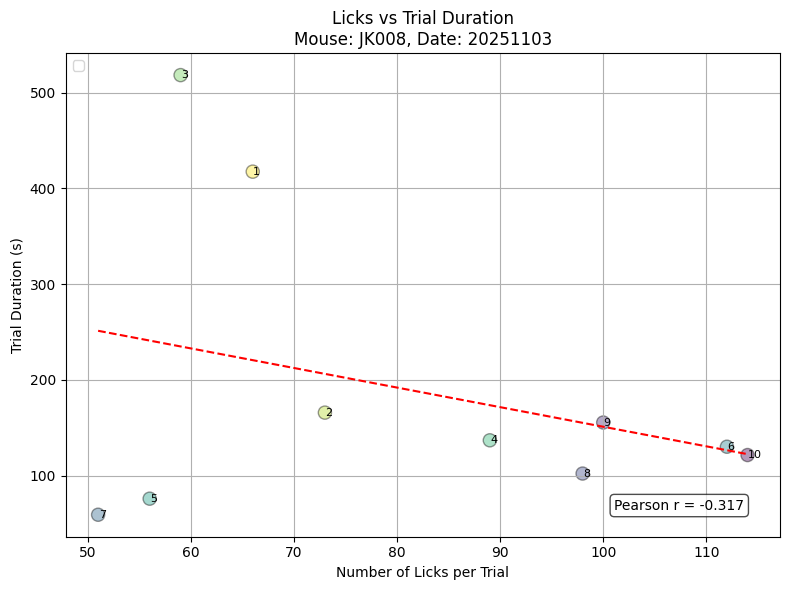

✅ Scatter saved to: Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_Licks_vs_TrialDuration_scatter.png


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to numpy arrays
lick_counts_arr = np.array(lick_counts)
durations_arr = np.array(trial_durations)
trials = np.arange(len(lick_counts_arr))  # trial indices for annotation

# --- Scatter plot: x = lick count, y = duration
plt.figure(figsize=(8,6))
plt.scatter(lick_counts_arr, durations_arr, s=90, c=trials, cmap='viridis_r', edgecolor='k', alpha=0.4)

# --- Optional: annotate points with trial number
for i, (x, y) in enumerate(zip(lick_counts_arr, durations_arr), start=1):
    plt.text(x + 0.05, y, str(i), fontsize=8, va='center')  # small offset so text doesn't overlap marker

# --- Regression line (least-squares)
if len(lick_counts_arr) >= 2:
    coeffs = np.polyfit(lick_counts_arr, durations_arr, deg=1)
    x_line = np.linspace(lick_counts_arr.min(), lick_counts_arr.max(), 100)
    y_line = np.polyval(coeffs, x_line)
    plt.plot(x_line, y_line, color='red', linestyle='--', linewidth=1.5) #label=f'Fit: y={coeffs[0]:.3f}x+{coeffs[1]:.3f}'
    # Pearson r
    if np.std(lick_counts_arr) > 0 and np.std(durations_arr) > 0:
        r = np.corrcoef(lick_counts_arr, durations_arr)[0,1]
        plt.text(0.95, 0.05, f'Pearson r = {r:.3f}', transform=plt.gca().transAxes,
                 ha='right', va='bottom', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.xlabel("Number of Licks per Trial")
plt.ylabel("Trial Duration (s)")
plt.title(f"Licks vs Trial Duration\nMouse: {mouse_id}, Date: {date_str}")
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')



# --- Save file
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
save_path = plots_path / f"{mouse_id}_{date_str}_Licks_vs_TrialDuration_scatter.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Scatter saved to: {save_path}")



# Building Heatmaps

## Step 5.0.1 - Assign boundaries to 1D grids

In [ ]:
## I need to create a dictionary such because different Session grid names have different boundaries which will determine the shape of the histogram heatmap.
# I will create a dictionary like this:
# grid_boundaries = {
#     "2-linear-s2s": [[-2, -1], [55, 62]],  # Example boundaries for 2 landmarks
#     "2-linear-fb": [[-2, -1], [55, 62]],  # Example boundaries for 4 landmarks
#     # Add more grid names and their boundaries as needed

# Write me some code that gives me the min and max X and Y values from the behaviour_df dataframe
min_x = behaviour_df["Value.JoystickPositionX"].min()
max_x = behaviour_df["Value.JoystickPositionX"].max()
min_y = behaviour_df["Value.JoystickPositionY"].min()
max_y = behaviour_df["Value.JoystickPositionY"].max()
print(f"X range: {min_x} to {max_x}")
print(f"Y range: {min_y} to {max_y}")

# Compute ranges
x_min, x_max = behaviour_df["Value.JoystickPositionX"].min(), behaviour_df["Value.JoystickPositionX"].max()
y_min, y_max = behaviour_df["Value.JoystickPositionY"].min(), behaviour_df["Value.JoystickPositionY"].max()

x_range = x_max - x_min
y_range = y_max - y_min

# Determine bins based on range
if x_range > y_range:
    bins_x = 30
    bins_y = 4
else:
    bins_x = 4
    bins_y = 30

print(f"Using bins: X = {bins_x}, Y = {bins_y}")


X range: -4.93012047 to 3.92561364
Y range: 53.5007706 to 60.4412994
Using bins: X = 30, Y = 4


## Step 5.0.2 - Produce 1D grid heatmap by counts

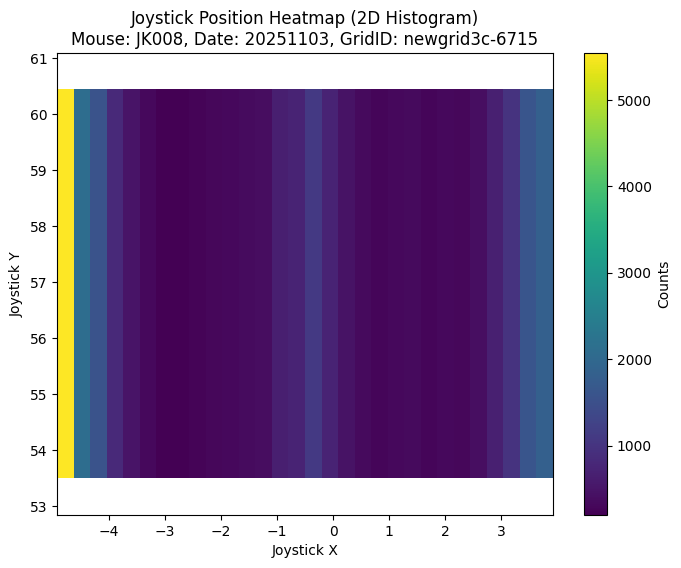

In [ ]:
import matplotlib.pyplot as plt

# Remove NaNs
df = behaviour_df.dropna(subset=["Value.JoystickPositionX", "Value.JoystickPositionY"])

plt.figure(figsize=(8, 6))
plt.hist2d(
    df["Value.JoystickPositionX"],
    df["Value.JoystickPositionY"],
    bins=[bins_x, 1],
    cmap="viridis"
)
plt.colorbar(label="Counts")
plt.xlabel("Joystick X")
plt.ylabel("Joystick Y")
plt.title(f"Joystick Position Heatmap (2D Histogram)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
plt.axis("equal")
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
plt.savefig(plots_path / f"{mouse_id}_{date_str}_{session_grid}_joystick_heatmap.png")

# I want this plot to be saved to this path : Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\ML_165\bestsessions\plots



#If the range in the X axis is larger than the range in the Y axis I want the bins to be 30 in the X axis and 4 in the Y axis.
#If the range in the Y axis is larger than the range in the X axis I want the bins to be 4 in the X axis and 30 in the Y axis.










## Step 5.1.0 - Produce heatmap for 2D grids WIP

Create 2D heatmap axis

In [ ]:
# --- Compute axis limits dynamically from landmark coordinates
landmark_x = [data["coords"][0] for data in landmarks.values()]
landmark_y = [data["coords"][1] for data in landmarks.values()]

x_min, x_max = min(landmark_x), max(landmark_x)
y_min, y_max = min(landmark_y), max(landmark_y)

# Add small margins (padding)
x_pad = jitter_value*2
y_pad = jitter_value*2

x_range = [x_min - x_pad, x_max + x_pad]
y_range = [y_min - y_pad, y_max + y_pad]

print(f"📊 Dynamic axis range set to:")
print(f"  X: {x_range}")
print(f"  Y: {y_range}")

📊 Dynamic axis range set to:
  X: [-6.960754051208497, 5.929754051208496]
  Y: [51.45112506103516, 62.41851125061035]


Print 2D heatmap

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


💾 Saved heatmap → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_newgrid3c-6715_joystick_heatmap.png


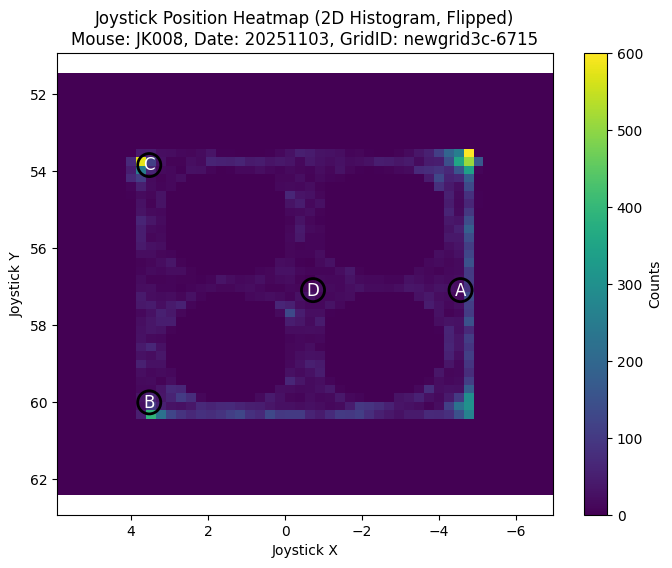

In [ ]:
# --- Step 3: Create 2D histogram (heatmap) of joystick positions with dynamic axis limits
import matplotlib.pyplot as plt
import numpy as np

# --- Create 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(
    behaviour_df["Value.JoystickPositionX"],
    behaviour_df["Value.JoystickPositionY"],
    bins=[50, 50],
    range=[x_range, y_range],
    cmap="viridis"
)

# --- Add landmark circles and labels
for label, data in landmarks.items():
    x, y = data["coords"]
    circle = plt.Circle((x, y), radius=0.3, color='black', fill=False, linewidth=2)
    plt.gca().add_patch(circle)
    plt.text(x, y, label, color='white', fontsize=12, ha='center', va='center')

# --- Colorbar and axis labels
plt.colorbar(label="Counts")
plt.xlabel("Joystick X")
plt.ylabel("Joystick Y")
plt.title(f"Joystick Position Heatmap (2D Histogram, Flipped)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
plt.axis("equal")

# --- Apply dynamic limits
plt.xlim(x_range)
plt.ylim(y_range)

# --- Flip both axes for correct orientation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# --- Save figure
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
save_path = plots_path / f"{mouse_id}_{date_str}_{session_grid}_joystick_heatmap.png"

plt.savefig(save_path, dpi=300, bbox_inches="tight")
print(f"💾 Saved heatmap → {save_path}")


Step 5.1.0 - Produce big heatmap for 2D grids if counts are out of range

In [ ]:
'''
# --- Step 3: Create 2D histogram (heatmap) of joystick positions with fixed axis limits
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist2d(
    behaviour_df["Value.JoystickPositionX"],
    behaviour_df["Value.JoystickPositionY"],
    bins=[50, 50],
    #range=[[-5.5, 5], [51, 61]],
    range=[[-10, 10], [52, 63]],
    cmap="viridis"
)


# Add landmark circles
for label, data in landmarks.items():
    x, y = data["coords"]
    circle = plt.Circle((x, y), radius=0.3, color='black', fill=False, linewidth=2)
    plt.gca().add_patch(circle)
    plt.text(x, y, label, color='white', fontsize=12, ha='center', va='center')

plt.colorbar(label="Counts")
plt.xlabel("Joystick X")
plt.ylabel("Joystick Y")
plt.title(f"Joystick Position Heatmap (2D Histogram, Flipped)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
plt.axis("equal")
#plt.xlim(-5.5, 5)
#plt.ylim(51, 61)
plt.xlim(-10, 10)
plt.ylim(52, 63)
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)

# Flip the plot by 180 degrees (invert both axes)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

#plt.show()
plt.savefig(plots_path / f"{mouse_id}_{date_str}_{session_grid}_joystick_heatmap.png")

'''


'\n# --- Step 3: Create 2D histogram (heatmap) of joystick positions with fixed axis limits\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(8, 6))\nplt.hist2d(\n    behaviour_df["Value.JoystickPositionX"],\n    behaviour_df["Value.JoystickPositionY"],\n    bins=[50, 50],\n    #range=[[-5.5, 5], [51, 61]],\n    range=[[-10, 10], [52, 63]],\n    cmap="viridis"\n)\n\n\n# Add landmark circles\nfor label, data in landmarks.items():\n    x, y = data["coords"]\n    circle = plt.Circle((x, y), radius=0.3, color=\'black\', fill=False, linewidth=2)\n    plt.gca().add_patch(circle)\n    plt.text(x, y, label, color=\'white\', fontsize=12, ha=\'center\', va=\'center\')\n\nplt.colorbar(label="Counts")\nplt.xlabel("Joystick X")\nplt.ylabel("Joystick Y")\nplt.title(f"Joystick Position Heatmap (2D Histogram, Flipped)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")\nplt.axis("equal")\n#plt.xlim(-5.5, 5)\n#plt.ylim(51, 61)\nplt.xlim(-10, 10)\nplt.ylim(52, 63)\nplots_path = session_

# Additional plots discussed in Schema meeting

## Produce state specific (A->B, B->C, etc.) heat-maps and trajectory plots
1. Find a way to concatenate any Joystick.csv files, into one large .csv file starting with the .csv that is from the earlier time.
2. Take the first and final time recorded during this session and bin the whole session into 100ms time slots. This requires taking an average if there are more than one counts for a given 100ms bin. Take the AllHarpEvents.csv, Similarly bin this into 100ms bins for the whole session, introduce specific rules such that if there is a solenoid event and also a solenoid=false then, take it too mean solenoid=true. If there is no reading in a 100ms bin, use whatever reading was given in the previous bin. (Unsure if I am currently doing the last two thing here)
3. Then merge these two csv files, making sure that they start and finish with the same 100ms bin.
4. Then check this all works (sanity check) by creating a 100ms binned heatmap, showing the solenoid events in red dots to confirm they mostly line up with rewarded landmarks
7. Once this is done Create trajectory plots for when the current landmark is B (if previously rewarded landmakr is A, show me a heatmap plot/trajectory plot until current landmark is B)

## 1. Process single/several joystick.csv files

In [ ]:
# Check the 'behaviour_csv = next((session_path / "Joystick")' path to see how many 'behaviour_csv = next((session_path / "Joystick").(glob("Joystick*.csv"))'  files there are. 
# If there is more than one, concatenate them into a single dataframe, starting with the .csv that is from the earlier time.
# Then save this concatenated dataframe as a new .csv file in the same directory as the original .csv files, with the name 'Concatenated_Joystick.csv'
# ------------------------------------------
# 🧩 1️⃣ CONCATENATE (OR PROCESS SINGLE) JOYSTICK FILES
# ------------------------------------------
import pandas as pd
from pathlib import Path
from datetime import datetime

joystick_folder = session_path / "Joystick"

# Find all joystick CSVs
joystick_files = sorted(
    joystick_folder.glob("Joystick*.csv"),
    key=lambda x: datetime.strptime(
        x.stem.replace("Joystick", ""),  # remove prefix
        "%Y-%m-%dT%H_%M_%S"              # match filename pattern
    )
)

# Load all joystick files
dataframes = [pd.read_csv(f) for f in joystick_files]

# ✅ Handle both single-file and multi-file cases the same way
if len(dataframes) == 0:
    raise FileNotFoundError("❌ No joystick CSV files found in folder!")

# Concatenate if multiple, or just use the single dataframe
if len(dataframes) > 1:
    concatenated_df = pd.concat(dataframes, ignore_index=True)
    print(f"✅ Concatenated {len(joystick_files)} files.")
else:
    concatenated_df = dataframes[0].copy()
    print(f"✅ Only one joystick file found: {joystick_files[0].name}")

# ✅ Keep a copy of the original Seconds column
concatenated_df['Seconds_Original'] = concatenated_df['Seconds']

# ✅ Normalize time so it starts at 0 (for internal analysis)
concatenated_df['Seconds'] -= concatenated_df['Seconds'].min()

# ✅ Sort by normalized time just to be safe
concatenated_df = concatenated_df.sort_values('Seconds', ignore_index=True)

# ✅ Save to same directory with consistent naming
concatenated_csv_path = joystick_folder / "Concatenated_Joystick.csv"
concatenated_df.to_csv(concatenated_csv_path, index=False)
print(f"✅ Processed joystick data saved to {concatenated_csv_path}")




✅ Concatenated 2 files.
✅ Processed joystick data saved to Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251103T133731\Joystick\Concatenated_Joystick.csv


## 2. Create a Binning function

In [ ]:
import pandas as pd
import numpy as np

def bin_by_time(df, time_col='Seconds', original_time_col='Seconds_Original', bin_size=0.1, continuous=False):
    df = df.copy()
    
    # Normalize time for binning
    df['time_bin'] = (np.floor(df[time_col] / bin_size) * bin_size).round(3)
    
    # Group and average numeric columns
    df_binned = df.groupby('time_bin', as_index=False).mean(numeric_only=True)
    
    # Preserve absolute timestamp per bin
    if original_time_col in df.columns:
        df_binned[original_time_col] = df.groupby('time_bin')[original_time_col].mean().values
    
    # Optional: create continuous bins
    if continuous:
        full_bins = pd.DataFrame({'time_bin': np.arange(df['time_bin'].min(), df['time_bin'].max() + bin_size, bin_size).round(3)})
        df_binned = pd.merge(full_bins, df_binned, on='time_bin', how='left')
    
    return df_binned


## 2.1 Bin the Joystick CSV file into 100ms bins

In [ ]:
# ------------------------------------------
# 🧩 2️⃣ LOAD AND BIN JOYSTICK DATA
# ------------------------------------------
# Concatenated/Single Joystick.csv file

alljoystick = pd.read_csv(joystick_folder / "Concatenated_Joystick.csv")

# Ensure absolute timestamps are preserved
alljoystick['Seconds_Original'] = alljoystick['Seconds_Original']

# Normalized time starting from 0 (for binning)
alljoystick['MeanSeconds'] = alljoystick['Seconds_Original'] - alljoystick['Seconds_Original'].iloc[0]

# Store the joystick start time
joystick_start_time = alljoystick['Seconds_Original'].iloc[0]
print(f"🎯 Joystick starts at absolute time: {joystick_start_time:.3f} s")

# Store the joystick end time
joystick_end_time = alljoystick['Seconds_Original'].iloc[-1]
print(f"🏁 Joystick ends at absolute time: {joystick_end_time:.3f} s")

# Bin into 100 ms bins (keeping original time too)
joystick_binned = bin_by_time(alljoystick, time_col='Seconds', original_time_col='Seconds_Original', bin_size=0.1, continuous=True)
#print(joystick_binned.head(30))

min_joystick_time = joystick_binned['time_bin'].min()
max_joystick_time = joystick_binned['time_bin'].max()
print(f"⏲️ Binned joystick time is from {min_joystick_time:.1f} s to {max_joystick_time:.1f} s")




🎯 Joystick starts at absolute time: 3845021796.492 s
🏁 Joystick ends at absolute time: 3845023905.462 s
⏲️ Binned joystick time is from 0.0 s to 2108.9 s


In [ ]:
print(alljoystick.head(50))

     Seconds  Value.EncoderValueX  Value.EncoderValueY  \
0   0.000000                   57                  -36   
1   0.009984                   58                  -35   
2   0.020000                   59                  -34   
3   0.029984                   61                  -32   
4   0.149984                   60                  -32   
5   0.160000                   59                  -31   
6   0.189984                   58                  -31   
7   0.200000                   58                  -32   
8   0.209984                   58                  -33   
9   0.220000                   58                  -34   
10  0.229984                   59                  -36   
11  0.240000                   60                  -41   
12  0.249984                   61                  -48   
13  0.260000                   62                  -56   
14  0.269984                   62                  -62   
15  0.280000                   61                  -66   
16  0.289984  

In [ ]:
print(joystick_binned.head(10))

   time_bin   Seconds  Value.EncoderValueX  Value.EncoderValueY  \
0       0.0  0.014992            58.750000           -34.250000   
1       0.1  0.174992            58.750000           -31.500000   
2       0.2  0.254992            60.300000           -50.400000   
3       0.3  0.344992            68.875000           -50.500000   
4       0.4  0.439989            71.666667           -48.666667   
5       0.5  0.509984            71.000000           -50.000000   
6       0.6  0.644992            70.500000           -51.000000   
7       0.7       NaN                  NaN                  NaN   
8       0.8       NaN                  NaN                  NaN   
9       0.9       NaN                  NaN                  NaN   

   Value.JoystickPositionX  Value.JoystickPositionY  Seconds_Original  \
0                -0.760597                57.879724      3.845022e+09   
1                -0.845841                57.945847      3.845022e+09   
2                -0.307374                5

## 2.2 Load and align the Harp csv to Joystick csv

In [ ]:
harp_preview = pd.read_csv(harp_events_csv, nrows=5)
print("Columns in AllHarpEvents.csv:")
print(harp_preview.columns.tolist())
harp_preview.head()

Columns in AllHarpEvents.csv:
['Unnamed: 0', 'OutputSet_Time', 'OutputSet_DOPort0', 'OutputSet_DOPort1', 'OutputSet_DOPort2', 'OutputSet_SupplyPort0', 'OutputSet_SupplyPort1', 'OutputSet_SupplyPort2', 'OutputSet_Led0', 'OutputSet_Led1', 'OutputSet_Rgb0', 'OutputSet_Rgb1', 'OutputSet_DO0', 'OutputSet_DO1', 'OutputSet_DO2', 'OutputSet_DO3', 'AnalogData_AnalogInput0', 'AnalogData_AnalogInput1', 'StartCameras_CameraOutput0', 'StartCameras_CameraOutput1', 'TimestampSeconds_TimestampSeconds', 'EncoderData_Encoder0', 'EncoderData_Encoder1', 'EncoderData_Encoder2', 'Camera0Frame_FrameAcquired']


,Unnamed: 0,OutputSet_Time,OutputSet_DOPort0,OutputSet_DOPort1,OutputSet_DOPort2,OutputSet_SupplyPort0,OutputSet_SupplyPort1,OutputSet_SupplyPort2,OutputSet_Led0,OutputSet_Led1,...,OutputSet_DO3,AnalogData_AnalogInput0,AnalogData_AnalogInput1,StartCameras_CameraOutput0,StartCameras_CameraOutput1,TimestampSeconds_TimestampSeconds,EncoderData_Encoder0,EncoderData_Encoder1,EncoderData_Encoder2,Camera0Frame_FrameAcquired
0,0,3.845022e+09,False,False,False,False,False,False,False,False,...,False,7,10,True,False,3.845022e+09,-50,58,0,True
1,1,3.845022e+09,False,False,False,False,False,False,False,False,...,False,9,10,NaN,NaN,3.845022e+09,-50,58,0,True
2,2,3.845022e+09,False,False,False,False,False,False,False,False,...,False,8,9,NaN,NaN,3.845022e+09,-49,57,0,True
3,3,3.845022e+09,False,False,False,False,False,False,False,False,...,False,10,8,NaN,NaN,3.845022e+09,-48,57,0,True
4,4,3.845022e+09,False,False,False,False,False,False,False,False,...,False,6,8,NaN,NaN,3.845022e+09,-47,57,0,True


In [ ]:
# --- Load HARP events CSV and select relevant columns
harp_columns = ["OutputSet_Time", "OutputSet_DO2", "TimestampSeconds_TimestampSeconds"]
harp_events = pd.read_csv(harp_events_csv, usecols=harp_columns)

# Keep absolute timestamp
harp_events['Seconds_Original'] = harp_events['OutputSet_Time']

# --- Find the first HARP timestamp that occurs *after* joystick start
harp_later = harp_events[harp_events['Seconds_Original'] >= joystick_start_time]

if harp_later.empty:
    raise ValueError("No HARP timestamps occur after the joystick start time!")

harp_start_time = harp_later['Seconds_Original'].iloc[0]
harp_start_idx = harp_later.index[0]

print(f"🎯 Joystick starts at {joystick_start_time:.6f}")
print(f"🎯 First HARP timestamp ≥ joystick start: {harp_start_time:.6f} (Δ = {harp_start_time - joystick_start_time:.3f} s)")


🎯 Joystick starts at 3845021796.492000
🎯 First HARP timestamp ≥ joystick start: 3845021833.247488 (Δ = 36.755 s)


C:\Users\jessek\AppData\Local\Temp\ipykernel_19392\1244830483.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  harp_events = pd.read_csv(harp_events_csv, usecols=harp_columns)


If running the above cell gives a particularly large delta between the Harp and Joystick starts then what this means is that all of the HarpEvent data has not been added to AllHarpEvents.csv. To confirm this, check the Behaviour.bin file and if there are two bin files per library i.e Behavior_82025-10-16T14_57_17 and Behavior_82025-10-16T15_00_10, then the difference in the times corresponds to The difference between Joystick start and First HARP timestamp which would be delta = 173s. This indicates that the first binned file is being overwritten rather than added in AllHarpEvents.csv

In [ ]:
print(harp_events.head(10))

   OutputSet_Time OutputSet_DO2  TimestampSeconds_TimestampSeconds  \
0    3.845022e+09          True                       3.845022e+09   
1    3.845022e+09          True                       3.845022e+09   
2    3.845022e+09          True                       3.845022e+09   
3    3.845022e+09          True                       3.845022e+09   
4    3.845022e+09          True                       3.845022e+09   
5    3.845022e+09          True                       3.845022e+09   
6    3.845022e+09          True                       3.845022e+09   
7    3.845022e+09          True                       3.845022e+09   
8    3.845022e+09          True                       3.845022e+09   
9    3.845023e+09          True                       3.845022e+09   

   Seconds_Original  
0      3.845022e+09  
1      3.845022e+09  
2      3.845022e+09  
3      3.845022e+09  
4      3.845022e+09  
5      3.845022e+09  
6      3.845022e+09  
7      3.845022e+09  
8      3.845022e+09  
9      3.

## 2.3 Load and align the Lick events csv to Joystick csv

In [ ]:
print(lick_time_df.head(10))

      Seconds  Value.LickDetected  Seconds_Original
0    0.000000                True      3.845022e+09
2    0.760992                True      3.845022e+09
4    1.885984                True      3.845022e+09
6    9.062976                True      3.845022e+09
8   11.312000                True      3.845022e+09
10  12.040992                True      3.845022e+09
12  12.437984                True      3.845022e+09
14  18.422976                True      3.845022e+09
16  18.884992                True      3.845022e+09
18  48.821984                True      3.845022e+09


In [ ]:
# operate on a copy to avoid SettingWithCopyWarning and ensure numeric dtype
lick_time_df = lick_time_df.copy()
#lick_time_df['Seconds_Original'] = lick_time_df['Seconds'].astype(float)

# find first lick after joystick start
lick_later = lick_time_df[lick_time_df['Seconds_Original'] >= joystick_start_time].reset_index(drop=False)

if lick_later.empty:
    raise ValueError("No Lick timestamps occur after the joystick start time!")

lick_start_time = lick_later['Seconds_Original'].iloc[0]
lick_end_time = lick_later['Seconds_Original'].iloc[-1]
lick_start_idx = int(lick_later['index'].iloc[0])
lick_time_difference = lick_start_time - joystick_start_time

print(f"🎯 Joystick starts at {joystick_start_time:.6f}")
print(f"🎯 First Lick timestamp ≥ joystick start: {lick_start_time:.6f} (Δ = {lick_time_difference:.3f} s)")


🎯 Joystick starts at 3845021796.492000
🎯 First Lick timestamp ≥ joystick start: 3845021821.596000 (Δ = 25.104 s)


## 2.4 Bin the aligned files from their earliest shared timepoint

In [ ]:
'''
# Create aligned seconds relative to joystick start
harp_events['Aligned_Seconds'] = harp_events['Seconds_Original'] - joystick_start_time
time_difference = harp_events['Aligned_Seconds'].min()
print(f"✅ HARP events aligned. Starts at {time_difference:.5f} s relative to joystick.")

# Bin HARP (aligned to joystick start)
#harp_binned = bin_by_time(harp_events, time_col='Aligned_Seconds', original_time_col='Seconds_Original', bin_size=0.1, continuous=True)

# ✅ Manually bin HARP data into 100 ms intervals
bin_size = 0.1  # seconds

# Create time_bin column based on aligned seconds
harp_events['time_bin'] = (harp_events['Aligned_Seconds'] // bin_size) * bin_size

# Aggregate within each bin
harp_binned = (
    harp_events
    .groupby('time_bin', as_index=False)
    .agg({
        'Seconds_Original': 'mean',
        'Aligned_Seconds': 'mean',
        'OutputSet_DO2': 'last'   # keep last state of digital output
    })
)

# Store the harp_events start time
harp_start_time = harp_events['Seconds_Original'].iloc[0]
min_harp_time = harp_binned['time_bin'].min()
print(f"🎯 HARP events start at absolute time: {harp_start_time:.3f} s")

# Store the joystick end time
harp_end_time = harp_events['Seconds_Original'].iloc[-1]
max_harp_time = harp_binned['time_bin'].max()
print(f"🏁 HARP events ends at absolute time: {harp_end_time:.3f} s")
print(f"⏲️ Binned Harp time is from {min_harp_time:.3f} s to {max_harp_time:.3f} s")
'''

'\n# Create aligned seconds relative to joystick start\nharp_events[\'Aligned_Seconds\'] = harp_events[\'Seconds_Original\'] - joystick_start_time\ntime_difference = harp_events[\'Aligned_Seconds\'].min()\nprint(f"✅ HARP events aligned. Starts at {time_difference:.5f} s relative to joystick.")\n\n# Bin HARP (aligned to joystick start)\n#harp_binned = bin_by_time(harp_events, time_col=\'Aligned_Seconds\', original_time_col=\'Seconds_Original\', bin_size=0.1, continuous=True)\n\n# ✅ Manually bin HARP data into 100 ms intervals\nbin_size = 0.1  # seconds\n\n# Create time_bin column based on aligned seconds\nharp_events[\'time_bin\'] = (harp_events[\'Aligned_Seconds\'] // bin_size) * bin_size\n\n# Aggregate within each bin\nharp_binned = (\n    harp_events\n    .groupby(\'time_bin\', as_index=False)\n    .agg({\n        \'Seconds_Original\': \'mean\',\n        \'Aligned_Seconds\': \'mean\',\n        \'OutputSet_DO2\': \'last\'   # keep last state of digital output\n    })\n)\n\n# Store the

In [ ]:
# --- Determine a global alignment start time across all sources ---
global_start_time = min(joystick_start_time, harp_start_time, lick_start_time)
print(f"⏰ Global start time (reference point): {global_start_time:.6f} s")

# --- Align HARP timestamps relative to the global start time ---
harp_events['Aligned_Seconds'] = harp_events['Seconds_Original'] - global_start_time
time_difference = harp_events['Aligned_Seconds'].min()
print(f"✅ HARP events aligned. Starts at {time_difference:.5f} s relative to global start.")

# --- Align Lick timestamps relative to the global start time ---
lick_time_df['Aligned_Seconds'] = lick_time_df['Seconds_Original'] - global_start_time
lick_time_difference = lick_time_df['Aligned_Seconds'].min()
print(f"✅ Lick events aligned. Starts at {lick_time_difference:.5f} s relative to global start.")

# --- Bin HARP (aligned to global start) ---
bin_size = 0.1  # seconds

# Create time_bin column based on aligned seconds
harp_events['time_bin'] = (harp_events['Aligned_Seconds'] // bin_size) * bin_size

# Aggregate within each bin
harp_binned = (
    harp_events
    .groupby('time_bin', as_index=False)
    .agg({
        'Seconds_Original': 'mean',
        'Aligned_Seconds': 'mean',
        'OutputSet_DO2': 'last'   # keep last state of digital output
    })
)

# Create time_bin column for lick events based on aligned seconds
lick_time_df['time_bin'] = (lick_time_df['Aligned_Seconds'] // bin_size) * bin_size

# Aggregate the lick events within each bin
lick_binned = (
    lick_time_df
    .groupby('time_bin', as_index=False)
    .agg({
        'Seconds_Original': 'mean',
        'Aligned_Seconds': 'mean',
        'Value.LickDetected': 'last'   # keep last state of lick detected
    })
)


# --- Store and print useful timing info ---
harp_start_time_abs = harp_events['Seconds_Original'].iloc[0]
harp_end_time_abs = harp_events['Seconds_Original'].iloc[-1]
min_harp_time = harp_binned['time_bin'].min()
max_harp_time = harp_binned['time_bin'].max()

print(f"🎯 HARP events start (absolute): {harp_start_time_abs:.3f} s")
print(f"🏁 HARP events end (absolute): {harp_end_time_abs:.3f} s")
print(f"⏲️ Binned HARP time: {min_harp_time:.3f} s → {max_harp_time:.3f} s (relative to global start)")

min_binned_lick_time = lick_binned['time_bin'].min()
max_binned_lick_time = lick_binned['time_bin'].max()

# Print useful lick timing info
print(f"🎯 Lick events start (absolute): {lick_start_time:.3f} s")
print(f"🏁 Lick events end (absolute): {lick_end_time:.3f} s")
print(f"⏲️ Binned Lick time: {min_binned_lick_time:.3f} s → {max_binned_lick_time:.3f} s (relative to global start)")

⏰ Global start time (reference point): 3845021796.492000 s
✅ HARP events aligned. Starts at 36.75549 s relative to global start.
✅ Lick events aligned. Starts at 25.10400 s relative to global start.
🎯 HARP events start (absolute): 3845021833.247 s
🏁 HARP events end (absolute): nan s
⏲️ Binned HARP time: 36.700 s → 2078.900 s (relative to global start)
🎯 Lick events start (absolute): 3845021821.596 s
🏁 Lick events end (absolute): 3845023900.530 s
⏲️ Binned Lick time: 25.100 s → 2104.000 s (relative to global start)


In [ ]:
#print(harp_binned.head(38))
print(lick_binned.head(10))

   time_bin  Seconds_Original  Aligned_Seconds  Value.LickDetected
0      25.1      3.845022e+09        25.104000                True
1      25.8      3.845022e+09        25.864992                True
2      26.9      3.845022e+09        26.989984                True
3      34.1      3.845022e+09        34.166976                True
4      36.4      3.845022e+09        36.416000                True
5      37.1      3.845022e+09        37.144992                True
6      37.5      3.845022e+09        37.541984                True
7      43.5      3.845022e+09        43.526976                True
8      43.9      3.845022e+09        43.988992                True
9      73.9      3.845022e+09        73.925984                True


## 3. Merge Joystick and Harp dfs

In [ ]:
# First merge joystick + harp
joystick_harp_merged = pd.merge_asof(
    joystick_binned.sort_values('time_bin'),
    harp_binned.sort_values('time_bin'),
    on='time_bin',
    direction='nearest',
    tolerance=0.05  # half of bin width
)

# Then merge the result with lick data
joystick_harp_lick_merged = pd.merge_asof(
    joystick_harp_merged.sort_values('time_bin'),
    lick_binned.sort_values('time_bin'),
    on='time_bin',
    direction='nearest',
    tolerance=0.05
)

# Inspect and save
display(joystick_harp_lick_merged.head(500))

# Save merged CSV
joystick_harp_lick_merged.to_csv(
    joystick_folder / "Binned_Joystick_Harp_Lick_Merged.csv",
    index=False
)


,time_bin,Seconds,Value.EncoderValueX,Value.EncoderValueY,Value.JoystickPositionX,Value.JoystickPositionY,Seconds_Original_x,MeanSeconds,Seconds_Original_y,Aligned_Seconds_x,OutputSet_DO2,Seconds_Original,Aligned_Seconds_y,Value.LickDetected
0,0.0,0.014992,58.750000,-34.250000,-0.760597,57.879724,3.845022e+09,0.014992,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.174992,58.750000,-31.500000,-0.845841,57.945847,3.845022e+09,0.174992,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.254992,60.300000,-50.400000,-0.307374,57.438932,3.845022e+09,0.254992,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.344992,68.875000,-50.500000,-0.570817,57.221150,3.845022e+09,0.344992,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.439989,71.666667,-48.666667,-0.714491,57.195666,3.845022e+09,0.439989,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,49.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,49.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,49.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.0 Sanity check: View heatmap of binned data with the coordinates in which OutputSet_DO2 are True

compute heatmap axis

In [ ]:
# --- Compute axis limits dynamically from landmark coordinates
landmark_x = [data["coords"][0] for data in landmarks.values()]
landmark_y = [data["coords"][1] for data in landmarks.values()]

x_min, x_max = min(landmark_x), max(landmark_x)
y_min, y_max = min(landmark_y), max(landmark_y)

# Add small margins (padding)
x_pad = jitter_value*2
y_pad = jitter_value*2

x_range = [x_min - x_pad, x_max + x_pad]
y_range = [y_min - y_pad, y_max + y_pad]

print(f"📊 Dynamic axis range set to:")
print(f"  X: {x_range}")
print(f"  Y: {y_range}")

📊 Dynamic axis range set to:
  X: [-6.960754051208497, 5.929754051208496]
  Y: [51.45112506103516, 62.41851125061035]


plot heatmap

✅ Using 43 bins where OutputSet_DO2 is True.


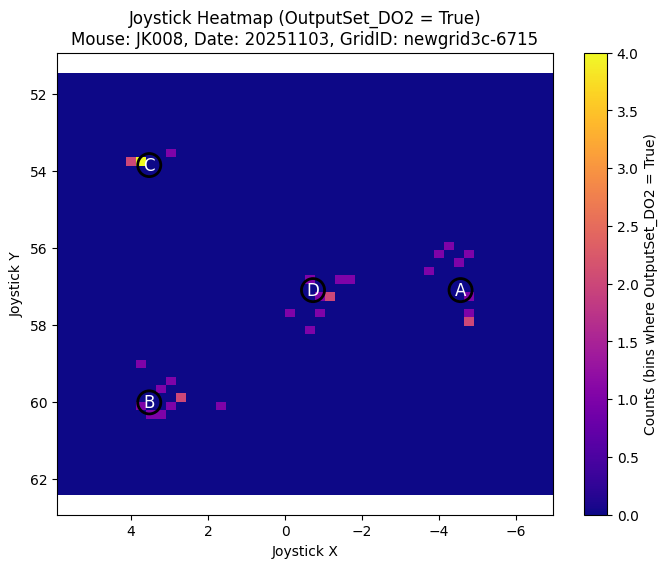

✅ Heatmap saved to: Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_newgrid3c-6715_joystick_heatmap_DO2_TRUE.png


In [ ]:
# --- Step: Create heatmap of joystick positions when OutputSet_DO2 is True
import matplotlib.pyplot as plt

# ✅ Filter to only frames where OutputSet_DO2 is True 
active_df = joystick_harp_lick_merged[joystick_harp_lick_merged["OutputSet_DO2"] == True].copy()
print(f"✅ Using {len(active_df)} bins where OutputSet_DO2 is True.")

# ✅ Determine X and Y range from all joystick data for consistent scaling
x_min, x_max = joystick_harp_lick_merged["Value.JoystickPositionX"].min(), joystick_harp_lick_merged["Value.JoystickPositionX"].max()
y_min, y_max = joystick_harp_lick_merged["Value.JoystickPositionY"].min(), joystick_harp_lick_merged["Value.JoystickPositionY"].max()

# --- Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(
    active_df["Value.JoystickPositionX"],
    active_df["Value.JoystickPositionY"],
    bins=[50, 50],
#    range=[[-5.5, 5], [51, 61]],
    range=[x_range, y_range], 
    cmap="plasma"  # use 'viridis' or 'plasma' for nice contrast
)

# --- Flip axes (match your existing heatmap orientation)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# --- Optional: Add landmarks if defined
try:
    for label, data in landmarks.items():
        x, y = data["coords"]
        circle = plt.Circle((x, y), radius=0.3, color='black', fill=False, linewidth=2)
        plt.gca().add_patch(circle)
        plt.text(x, y, label, color='white', fontsize=12, ha='center', va='center')
except NameError:
    pass  # landmarks dictionary not defined in this context

# --- Labels and save
plt.colorbar(label="Counts (bins where OutputSet_DO2 = True)")
plt.xlabel("Joystick X")
plt.ylabel("Joystick Y")
plt.title(f"Joystick Heatmap (OutputSet_DO2 = True)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
plt.axis("equal")

# --- Save figure
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
save_path = plots_path / f"{mouse_id}_{date_str}_{session_grid}_joystick_heatmap_DO2_TRUE.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Heatmap saved to: {save_path}")


## 4.1 Checking that the Solenoid Output value is correct  

In [ ]:
print(joystick_harp_lick_merged["OutputSet_DO2"].value_counts(dropna=False))
print(joystick_harp_lick_merged["OutputSet_DO2"].unique()[:20])


OutputSet_DO2
NaN     21047
True       43
Name: count, dtype: int64
[nan True]


## 4.2 Animation of rewards received

In [ ]:
'''
# --- Step: Animate reward deliveries over time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.animation as FFMpegWriter
from matplotlib.patches import Circle

# ✅ Filter only rows where reward was delivered
reward_df = joystick_harp_merged[joystick_harp_merged["OutputSet_DO2"] == True].copy()
reward_df = reward_df.sort_values("Seconds_Original_x").reset_index(drop=True)

print(f"✅ {len(reward_df)} rewards found for animation.")

# ✅ Set up figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(joystick_harp_merged["Value.JoystickPositionX"].min(),
            joystick_harp_merged["Value.JoystickPositionX"].max())
ax.set_ylim(joystick_harp_merged["Value.JoystickPositionY"].min(),
            joystick_harp_merged["Value.JoystickPositionY"].max())

# ✅ Flip axes to match your previous orientation
ax.invert_xaxis()
ax.invert_yaxis()

# --- Draw static landmarks
try:
    for label, data in landmarks.items():
        x, y = data["coords"]
        circle = Circle((x, y), radius=0.3, color="black", fill=False, linewidth=2)
        ax.add_patch(circle)
        ax.text(x, y, label, color="white", fontsize=12, ha="center", va="center")
except NameError:
    print("⚠️ Landmarks not defined — skipping landmark overlay.")

# --- Initialize scatter plot
scat = ax.scatter([], [], c="yellow", s=80, edgecolors="black", linewidths=0.8)
text_annotation = ax.text(0.02, 0.98, "", transform=ax.transAxes,
                          ha="left", va="top", color="white", fontsize=12)

ax.set_xlabel("Joystick X")
ax.set_ylabel("Joystick Y")
ax.set_title(f"Reward Deliveries Over Time\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
ax.set_aspect("equal")

# --- Animation update function
def update(frame):
    current_data = reward_df.iloc[:frame+1]
    scat.set_offsets(current_data[["Value.JoystickPositionX", "Value.JoystickPositionY"]].values)

    # Annotate most recent reward
    if not current_data.empty:
        latest = current_data.iloc[-1]
        reward_num = frame + 1
        reward_time = latest["Seconds_Original_x"]
        text_annotation.set_text(f"Reward {reward_num}/{len(reward_df)}\nTime: {reward_time:.2f} s")

    return scat, text_annotation

# --- Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(reward_df),
    interval=800, blit=True, repeat=False
)

# --- Save or display
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
video_path = plots_path / f"{mouse_id}_{date_str}_{session_grid}_RewardAnimation.mp4"
#writer = FFMpegWriter(fps=2, bitrate=1800)

#ani.save(str(video_path), writer=writer, dpi=150)  # 👈 Convert Path to string
ani.save(str(video_path.with_suffix(".gif")), writer="pillow", dpi=150)
plt.show()

print(f"🎥 Animation saved to: {video_path}")
'''

'\n# --- Step: Animate reward deliveries over time\nimport matplotlib.pyplot as plt\nimport matplotlib.animation as animation\nimport matplotlib.animation as FFMpegWriter\nfrom matplotlib.patches import Circle\n\n# ✅ Filter only rows where reward was delivered\nreward_df = joystick_harp_merged[joystick_harp_merged["OutputSet_DO2"] == True].copy()\nreward_df = reward_df.sort_values("Seconds_Original_x").reset_index(drop=True)\n\nprint(f"✅ {len(reward_df)} rewards found for animation.")\n\n# ✅ Set up figure\nfig, ax = plt.subplots(figsize=(8, 6))\nax.set_xlim(joystick_harp_merged["Value.JoystickPositionX"].min(),\n            joystick_harp_merged["Value.JoystickPositionX"].max())\nax.set_ylim(joystick_harp_merged["Value.JoystickPositionY"].min(),\n            joystick_harp_merged["Value.JoystickPositionY"].max())\n\n# ✅ Flip axes to match your previous orientation\nax.invert_xaxis()\nax.invert_yaxis()\n\n# --- Draw static landmarks\ntry:\n    for label, data in landmarks.items():\n      

## 4.3 Sanity check: View heatmap of binned data with the coordinates in which Value.LickDetected are True 

## plot Lick heatmap

✅ Using 885 bins where Value.LickDetected is True.


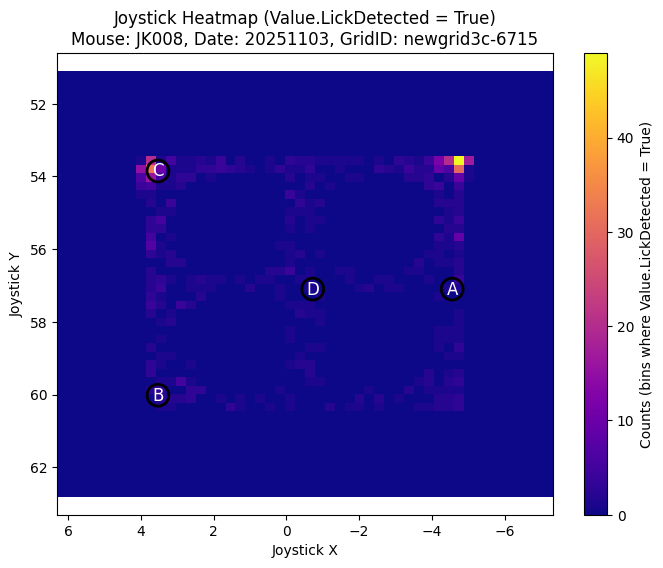

✅ Heatmap saved to: Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_newgrid3c-6715_joystick_heatmap_LickDetected_TRUE.png


In [ ]:
# --- Step: Create heatmap of joystick positions when Value.LickDetected is True
import matplotlib.pyplot as plt

# ✅ Filter to only frames where a lick was detected
lick_df = joystick_harp_lick_merged[joystick_harp_lick_merged["Value.LickDetected"] == True].copy()
print(f"✅ Using {len(lick_df)} bins where Value.LickDetected is True.")

'''
# ✅ Determine X and Y range from all joystick data for consistent scaling
x_min = joystick_harp_lick_merged["Value.JoystickPositionX"].min()
x_max = joystick_harp_lick_merged["Value.JoystickPositionX"].max()
y_min = joystick_harp_lick_merged["Value.JoystickPositionY"].min()
y_max = joystick_harp_lick_merged["Value.JoystickPositionY"].max()

x_range = [x_min, x_max]
y_range = [y_min, y_max]
'''
x_range = [x_min - x_pad, x_max + x_pad]
y_range = [y_min - y_pad, y_max + y_pad]


# --- Plot the 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(
    lick_df["Value.JoystickPositionX"],
    lick_df["Value.JoystickPositionY"],
    bins=[50, 50],
    range=[x_range, y_range],
    cmap="plasma"
)

# --- Flip axes to match existing convention
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# --- Optional: Add landmarks if defined
try:
    for label, data in landmarks.items():
        x, y = data["coords"]
        circle = plt.Circle((x, y), radius=0.3, color='black', fill=False, linewidth=2)
        plt.gca().add_patch(circle)
        plt.text(x, y, label, color='white', fontsize=12, ha='center', va='center')
except NameError:
    pass  # landmarks dictionary not defined

# --- Labels and save
plt.colorbar(label="Counts (bins where Value.LickDetected = True)")
plt.xlabel("Joystick X")
plt.ylabel("Joystick Y")
plt.title(f"Joystick Heatmap (Value.LickDetected = True)\nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid}")
plt.axis("equal")

# --- Save figure
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)
save_path = plots_path / f"{mouse_id}_{date_str}_{session_grid}_joystick_heatmap_LickDetected_TRUE.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Heatmap saved to: {save_path}")

In [ ]:
print("X min/max:", x_min, x_max)
print("Y min/max:", y_min, y_max)
print("X range used:", x_range)

X min/max: -4.93012047 3.908691525
Y min/max: 53.5007706 60.4040260375
X range used: [np.float64(-7.330120470000001), np.float64(6.308691525)]


## 5. Create Trajectory plots of the joystick coordinate between when 2 rewards were achieved

In [ ]:
# --- Build segments that span from one reward event to the next reward event
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Work on a local copy for safety
df = joystick_harp_lick_merged[['time_bin', 'Value.JoystickPositionX', 'Value.JoystickPositionY', 'OutputSet_DO2', 'Value.LickDetected']].copy()

# 1) Make a clean boolean column for reward state (treat NaN as False)
df['OutputSet_DO2_bool'] = df['OutputSet_DO2'].fillna(False).astype(bool)

# 2) Detect reward ONSETS (first True after a False)
#    This finds rows where OutputSet_DO2_bool == True and previous row was False (or start).
df['prev_DO2'] = df['OutputSet_DO2_bool'].shift(fill_value=False)
onset_mask = df['OutputSet_DO2_bool'] & (~df['prev_DO2'])

# Get onset times (time_bin) and their indices
onset_times = df.loc[onset_mask, 'time_bin'].values
onset_indices = df.loc[onset_mask].index.values

print(f"✅ Found {len(onset_times)} reward ONSET events (first True bins).")

# 3) Construct segments from onset_i to onset_{i+1}
#    Each segment covers times >= onset_i and < onset_{i+1}.
segments_between_rewards = []
for i in range(len(onset_times) - 1):
    start_time = onset_times[i]
    end_time = onset_times[i + 1]  # exclusive endpoint
    # select rows for this segment
    seg_mask = (df['time_bin'] >= start_time) & (df['time_bin'] < end_time)
    seg_idx = df.index[seg_mask]
    if len(seg_idx) > 0:
        segments_between_rewards.append((seg_idx[0], seg_idx[-1]))  # (start_idx, end_idx)

# Optionally include the final segment from last onset to end-of-recording:
if len(onset_times) >= 1:
    last_start_time = onset_times[-1]
    seg_mask = df['time_bin'] >= last_start_time
    seg_idx = df.index[seg_mask]
    if len(seg_idx) > 0:
        segments_between_rewards.append((seg_idx[0], seg_idx[-1]))

print(f"✅ Built {len(segments_between_rewards)} segments BETWEEN rewards (including final tail).")

# 4) Build a summary dataframe, now including lick information, in particular the final lick_idx within each segment
summary = []
for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    s_time = df.loc[s_idx, 'time_bin']
    e_time = df.loc[e_idx, 'time_bin']
    
    seg_df = df.loc[s_idx:e_idx]

    # Find licks within segment
    lick_mask = seg_df['Value.LickDetected'] == True
    lick_indices = seg_df.index[lick_mask]

    # If ANY licks exist → last lick index, else None
    if len(lick_indices) > 0:
        final_lick_idx = lick_indices[-1]
        final_lick_time = df.loc[final_lick_idx, 'time_bin']
    else:
        final_lick_idx = None
        final_lick_time = None

    summary.append({
        'segment': i,
        'start_idx': int(s_idx),
        'end_idx': int(e_idx),
        'start_time_s': float(s_time),
        'end_time_s': float(e_time),
        'duration_s': float(e_time - s_time),
        'n_bins': int(e_idx - s_idx + 1),
        'n_licks': int(lick_mask.sum()),
        'final_lick_idx': final_lick_idx,
        'final_lick_time': final_lick_time
    })

summary_df = pd.DataFrame(summary)
display(summary_df)

# Optional: print preview of lick-rich segments
licky = summary_df[summary_df['n_licks'] > 0]
print(f"💧 Found {len(licky)} segments containing at least one lick event.")
display(licky.head())


    
'''
 # --- Optional: Add landmarks if defined
try:
    for label, data in landmarks.items():
        x_l, y_l = data["coords"]
        circle = plt.Circle((x_l, y_l), radius=0.3, color='black', fill=False, linewidth=2, zorder=1)
        plt.gca().add_patch(circle)
        plt.text(x_l, y_l, label, color='white', fontsize=12, ha='center', va='center', zorder=2)
except NameError:
    pass  # landmarks not defined
'''



✅ Found 43 reward ONSET events (first True bins).
✅ Built 43 segments BETWEEN rewards (including final tail).


C:\Users\jessek\AppData\Local\Temp\ipykernel_19392\3115043615.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OutputSet_DO2_bool'] = df['OutputSet_DO2'].fillna(False).astype(bool)


,segment,start_idx,end_idx,start_time_s,end_time_s,duration_s,n_bins,n_licks,final_lick_idx,final_lick_time
0,1,367,1147,36.7,114.7,78.0,781,9,1144,114.4
1,2,1148,4299,114.8,429.9,315.1,3152,41,4295,429.5
2,3,4300,4339,430.0,433.9,3.9,40,10,4331,433.1
3,4,4340,4540,434.0,454.0,20.0,201,6,4410,441.0
4,5,4541,4901,454.1,490.1,36.0,361,5,4892,489.2
5,6,4902,4949,490.2,494.9,4.7,48,5,4944,494.4
6,7,4950,5885,495.0,588.5,93.5,936,52,5878,587.8
7,8,5886,6199,588.6,619.9,31.3,314,11,6180,618.0
8,9,6200,8444,620.0,844.4,224.4,2245,17,8439,843.9
9,10,8445,9565,844.5,956.5,112.0,1121,1,9563,956.3


💧 Found 43 segments containing at least one lick event.


,segment,start_idx,end_idx,start_time_s,end_time_s,duration_s,n_bins,n_licks,final_lick_idx,final_lick_time
0,1,367,1147,36.7,114.7,78.0,781,9,1144,114.4
1,2,1148,4299,114.8,429.9,315.1,3152,41,4295,429.5
2,3,4300,4339,430.0,433.9,3.9,40,10,4331,433.1
3,4,4340,4540,434.0,454.0,20.0,201,6,4410,441.0
4,5,4541,4901,454.1,490.1,36.0,361,5,4892,489.2


'\n # --- Optional: Add landmarks if defined\ntry:\n    for label, data in landmarks.items():\n        x_l, y_l = data["coords"]\n        circle = plt.Circle((x_l, y_l), radius=0.3, color=\'black\', fill=False, linewidth=2, zorder=1)\n        plt.gca().add_patch(circle)\n        plt.text(x_l, y_l, label, color=\'white\', fontsize=12, ha=\'center\', va=\'center\', zorder=2)\nexcept NameError:\n    pass  # landmarks not defined\n'

Match segments to landmark transitions

In [ ]:
# Segment 1 will always be from landmark A to landmark B, segment 2 from B to C, segment 3 from C to D, segment 4 from D to A, and then repeat for subsequent segments.
# So I need to assign landmark pairs to each segment in a cyclical manner.
# I can do this by creating a list of landmark pairs and then using modulo arithmetic to assign them to segments.
landmark_labels = list(landmarks.keys())
landmark_pairs = []
num_landmarks = len(landmark_labels)
for i in range(len(segments_between_rewards)):
    start_landmark = landmark_labels[i % num_landmarks]
    end_landmark = landmark_labels[(i + 1) % num_landmarks]
    landmark_pairs.append((start_landmark, end_landmark))
# Add landmark pairs to summary_df
summary_df['landmark_start'] = [pair[0] for pair in landmark_pairs]
summary_df['landmark_end'] = [pair[1] for pair in landmark_pairs]
display(summary_df)



,segment,start_idx,end_idx,start_time_s,end_time_s,duration_s,n_bins,n_licks,final_lick_idx,final_lick_time,landmark_start,landmark_end
0,1,367,1147,36.7,114.7,78.0,781,9,1144,114.4,A,B
1,2,1148,4299,114.8,429.9,315.1,3152,41,4295,429.5,B,C
2,3,4300,4339,430.0,433.9,3.9,40,10,4331,433.1,C,D
3,4,4340,4540,434.0,454.0,20.0,201,6,4410,441.0,D,A
4,5,4541,4901,454.1,490.1,36.0,361,5,4892,489.2,A,B
5,6,4902,4949,490.2,494.9,4.7,48,5,4944,494.4,B,C
6,7,4950,5885,495.0,588.5,93.5,936,52,5878,587.8,C,D
7,8,5886,6199,588.6,619.9,31.3,314,11,6180,618.0,D,A
8,9,6200,8444,620.0,844.4,224.4,2245,17,8439,843.9,A,B
9,10,8445,9565,844.5,956.5,112.0,1121,1,9563,956.3,B,C


Define nearest landmark for each rewarded segment

In [ ]:
'''
import math

def nearest_landmark(x, y, landmarks, invert_x=False, invert_y=False):
    best_label = None
    best_dist = float('inf')
    for label, data in landmarks.items():
        lx, ly = data["coords"]
        d = math.hypot(x - lx, y - ly)
        if d < best_dist:
            best_label, best_dist = label, d
    return best_label
'''

'\nimport math\n\ndef nearest_landmark(x, y, landmarks, invert_x=False, invert_y=False):\n    best_label = None\n    best_dist = float(\'inf\')\n    for label, data in landmarks.items():\n        lx, ly = data["coords"]\n        d = math.hypot(x - lx, y - ly)\n        if d < best_dist:\n            best_label, best_dist = label, d\n    return best_label\n'

Print nearest landmark for each rewarded segment

In [ ]:
'''
for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    seg = df.loc[s_idx:e_idx]
    start_x, start_y = seg['Value.JoystickPositionX'].iloc[0], seg['Value.JoystickPositionY'].iloc[0]
    end_x, end_y   = seg['Value.JoystickPositionX'].iloc[-1], seg['Value.JoystickPositionY'].iloc[-1]

    start_label = nearest_landmark(start_x, start_y, landmarks)
    end_label   = nearest_landmark(end_x, end_y, landmarks)

#uncomment to print segment info
    print(f"Segment {i}:")
    print(f"  start ({start_x:.3f}, {start_y:.3f}) → nearest {start_label}")
    print(f"  end   ({end_x:.3f}, {end_y:.3f}) → nearest {end_label}")
    print()
    
'''

'\nfor i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):\n    seg = df.loc[s_idx:e_idx]\n    start_x, start_y = seg[\'Value.JoystickPositionX\'].iloc[0], seg[\'Value.JoystickPositionY\'].iloc[0]\n    end_x, end_y   = seg[\'Value.JoystickPositionX\'].iloc[-1], seg[\'Value.JoystickPositionY\'].iloc[-1]\n\n    start_label = nearest_landmark(start_x, start_y, landmarks)\n    end_label   = nearest_landmark(end_x, end_y, landmarks)\n\n#uncomment to print segment info\n    print(f"Segment {i}:")\n    print(f"  start ({start_x:.3f}, {start_y:.3f}) → nearest {start_label}")\n    print(f"  end   ({end_x:.3f}, {end_y:.3f}) → nearest {end_label}")\n    print()\n\n'

Handles NAN's if I want to but code is a bit clunkier:

In [ ]:
'''
import math
import numpy as np

# Define your cyclic order of landmarks
LANDMARK_ORDER = ["A", "B", "C", "D"]

def nearest_landmark(x, y, landmarks, invert_x=False, invert_y=False):
    """Return nearest landmark label to (x, y), handling NaN values safely."""
    if x is None or y is None or np.isnan(x) or np.isnan(y):
        return None

    if invert_x:
        x = -x
    if invert_y:
        y = -y

    best_label = None
    best_dist = float('inf')

    for label, data in landmarks.items():
        lx, ly = data["coords"]
        if np.isnan(lx) or np.isnan(ly):
            continue
        d = math.hypot(x - lx, y - ly)
        if d < best_dist:
            best_label, best_dist = label, d

    return best_label


def infer_missing_label(known_label, direction="next"):
    """Infer the next or previous label given known landmark and cyclic A-B-C-D order."""
    if known_label not in LANDMARK_ORDER:
        return None
    idx = LANDMARK_ORDER.index(known_label)
    if direction == "next":
        return LANDMARK_ORDER[(idx + 1) % len(LANDMARK_ORDER)]
    elif direction == "prev":
        return LANDMARK_ORDER[(idx - 1) % len(LANDMARK_ORDER)]
    return None


# --- Main loop ---
for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    seg = df.loc[s_idx:e_idx]

    start_x, start_y = seg['Value.JoystickPositionX'].iloc[0], seg['Value.JoystickPositionY'].iloc[0]
    end_x, end_y   = seg['Value.JoystickPositionX'].iloc[-1], seg['Value.JoystickPositionY'].iloc[-1]

    # Compute nearest landmarks
    start_label = nearest_landmark(start_x, start_y, landmarks)
    end_label   = nearest_landmark(end_x, end_y, landmarks)

    # --- Handle missing start/end labels based on cyclic rule ---
    if start_label is None and end_label is not None:
        start_label = infer_missing_label(end_label, direction="prev")

    elif end_label is None and start_label is not None:
        end_label = infer_missing_label(start_label, direction="next")

    print(f"Segment {i}:")
    print(f"  start ({'NaN' if np.isnan(start_x) else f'{start_x:.3f}'}, {'NaN' if np.isnan(start_y) else f'{start_y:.3f}'}) → nearest {start_label or 'Unknown'}")
    print(f"  end   ({'NaN' if np.isnan(end_x) else f'{end_x:.3f}'}, {'NaN' if np.isnan(end_y) else f'{end_y:.3f}'}) → nearest {end_label or 'Unknown'}")
    print()

    '''


'\nimport math\nimport numpy as np\n\n# Define your cyclic order of landmarks\nLANDMARK_ORDER = ["A", "B", "C", "D"]\n\ndef nearest_landmark(x, y, landmarks, invert_x=False, invert_y=False):\n    """Return nearest landmark label to (x, y), handling NaN values safely."""\n    if x is None or y is None or np.isnan(x) or np.isnan(y):\n        return None\n\n    if invert_x:\n        x = -x\n    if invert_y:\n        y = -y\n\n    best_label = None\n    best_dist = float(\'inf\')\n\n    for label, data in landmarks.items():\n        lx, ly = data["coords"]\n        if np.isnan(lx) or np.isnan(ly):\n            continue\n        d = math.hypot(x - lx, y - ly)\n        if d < best_dist:\n            best_label, best_dist = label, d\n\n    return best_label\n\n\ndef infer_missing_label(known_label, direction="next"):\n    """Infer the next or previous label given known landmark and cyclic A-B-C-D order."""\n    if known_label not in LANDMARK_ORDER:\n        return None\n    idx = LANDMARK_ORD

Create transition matrices for each segment

In [ ]:
'''
segment_labels = []
for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    seg = df.loc[s_idx:e_idx]
    start_x, start_y = seg['Value.JoystickPositionX'].iloc[0], seg['Value.JoystickPositionY'].iloc[0]
    end_x, end_y = seg['Value.JoystickPositionX'].iloc[-1], seg['Value.JoystickPositionY'].iloc[-1]

    start_label = nearest_landmark(start_x, start_y, landmarks)
    end_label = nearest_landmark(end_x, end_y, landmarks)
    transition = f"{start_label}→{end_label}"

    segment_labels.append({
        "segment": i,
        "start_label": start_label,
        "end_label": end_label,
        "transition": transition
    })

segment_label_df = pd.DataFrame(segment_labels)
display(segment_label_df)
'''

'\nsegment_labels = []\nfor i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):\n    seg = df.loc[s_idx:e_idx]\n    start_x, start_y = seg[\'Value.JoystickPositionX\'].iloc[0], seg[\'Value.JoystickPositionY\'].iloc[0]\n    end_x, end_y = seg[\'Value.JoystickPositionX\'].iloc[-1], seg[\'Value.JoystickPositionY\'].iloc[-1]\n\n    start_label = nearest_landmark(start_x, start_y, landmarks)\n    end_label = nearest_landmark(end_x, end_y, landmarks)\n    transition = f"{start_label}→{end_label}"\n\n    segment_labels.append({\n        "segment": i,\n        "start_label": start_label,\n        "end_label": end_label,\n        "transition": transition\n    })\n\nsegment_label_df = pd.DataFrame(segment_labels)\ndisplay(segment_label_df)\n'

### Quanitfying path taken vs shortest path
1. Find the distance travelled in a segment
2. Identify the start and end label for that segment and the distance between them
3. Calculate the distance they travelled in a segment divided by the shortest path distance, calculated in point 2. 

In [ ]:
import numpy as np
import math

efficiency_data = []

for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    seg = joystick_harp_lick_merged.loc[s_idx:e_idx, ['Value.JoystickPositionX', 'Value.JoystickPositionY']].dropna()

    # Skip if there aren’t enough points
    if len(seg) < 2:
        efficiency_data.append({"segment": i, "distance_travelled": np.nan,
                                "shortest_distance": np.nan, "efficiency": np.nan})
        continue

    # --- 1️⃣ Distance travelled within the segment
    x = seg["Value.JoystickPositionX"].values
    y = seg["Value.JoystickPositionY"].values
    dx = np.diff(x)
    dy = np.diff(y)
    distance_travelled = np.sum(np.sqrt(dx**2 + dy**2))

    # --- 2️⃣ Shortest (straight-line) distance between start and end landmarks
    row = summary_df.loc[summary_df["segment"] == i].iloc[0]
    start_label = row["landmark_start"]
    end_label = row["landmark_end"]

    if (start_label in landmarks) and (end_label in landmarks):
        sx, sy = landmarks[start_label]["coords"]
        ex, ey = landmarks[end_label]["coords"]
        shortest_distance = math.hypot(ex - sx, ey - sy)
    else:
        shortest_distance = np.nan

    # --- 3️⃣ Efficiency
    if distance_travelled > 0 and not np.isnan(shortest_distance):
        relative_efficiency = distance_travelled / shortest_distance
    else:
        relative_efficiency = np.nan

    efficiency_data.append({
        "segment": i,
        "distance_travelled": distance_travelled,
        "shortest_distance": shortest_distance,
        "efficiency": relative_efficiency
    })

# --- Combine into a DataFrame and merge with labels
efficiency_df = pd.DataFrame(efficiency_data)
summary_df = summary_df.merge(efficiency_df, on="segment", how="left")

display(summary_df.head(10))


,segment,start_idx,end_idx,start_time_s,end_time_s,duration_s,n_bins,n_licks,final_lick_idx,final_lick_time,landmark_start,landmark_end,distance_travelled,shortest_distance,efficiency
0,1,367,1147,36.7,114.7,78.0,781,9,1144,114.4,A,B,176.755915,8.600434,20.551976
1,2,1148,4299,114.8,429.9,315.1,3152,41,4295,429.5,B,C,485.287281,6.167386,78.686054
2,3,4300,4339,430.0,433.9,3.9,40,10,4331,433.1,C,D,23.347146,5.355087,4.359807
3,4,4340,4540,434.0,454.0,20.0,201,6,4410,441.0,D,A,86.008273,3.834400,22.430699
4,5,4541,4901,454.1,490.1,36.0,361,5,4892,489.2,A,B,76.684640,8.600434,8.916369
5,6,4902,4949,490.2,494.9,4.7,48,5,4944,494.4,B,C,21.856945,6.167386,3.543956
6,7,4950,5885,495.0,588.5,93.5,936,52,5878,587.8,C,D,324.460440,5.355087,60.589201
7,8,5886,6199,588.6,619.9,31.3,314,11,6180,618.0,D,A,83.861290,3.834400,21.870772
8,9,6200,8444,620.0,844.4,224.4,2245,17,8439,843.9,A,B,320.672610,8.600434,37.285631
9,10,8445,9565,844.5,956.5,112.0,1121,1,9563,956.3,B,C,165.007703,6.167386,26.754884


view transition efficient table

In [ ]:
# --- Make a transition label (e.g., "A→B")
summary_df["transition"] = summary_df["landmark_start"] + "→" + summary_df["landmark_end"]

# --- Compute mean efficiency per transition type
transition_efficiency = (
    summary_df.groupby("transition", dropna=False)["efficiency"]
    .agg(["mean", "std", "count"])
    .reset_index()
    .sort_values("transition")
)

display(transition_efficiency)

# --- Save CSV
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)

transition_efficiency.to_csv(
    plots_path / f"{mouse_id}_{date_str}_Segment_Transition_Efficiency.csv",
    index=False
)



,transition,mean,std,count
0,A→B,12.718996,10.087287,11
1,B→C,16.101723,23.868166,11
2,C→D,23.375729,20.266570,11
3,D→A,23.071365,16.005842,10


add transitions to summary_df table

In [ ]:
# add transitions to summary_df table
summary_df["transition"] = summary_df["landmark_start"] + "→" + summary_df["landmark_end"]
display(summary_df.head(10))


,segment,start_idx,end_idx,start_time_s,end_time_s,duration_s,n_bins,n_licks,final_lick_idx,final_lick_time,landmark_start,landmark_end,distance_travelled,shortest_distance,efficiency,transition
0,1,367,1147,36.7,114.7,78.0,781,9,1144,114.4,A,B,176.755915,8.600434,20.551976,A→B
1,2,1148,4299,114.8,429.9,315.1,3152,41,4295,429.5,B,C,485.287281,6.167386,78.686054,B→C
2,3,4300,4339,430.0,433.9,3.9,40,10,4331,433.1,C,D,23.347146,5.355087,4.359807,C→D
3,4,4340,4540,434.0,454.0,20.0,201,6,4410,441.0,D,A,86.008273,3.834400,22.430699,D→A
4,5,4541,4901,454.1,490.1,36.0,361,5,4892,489.2,A,B,76.684640,8.600434,8.916369,A→B
5,6,4902,4949,490.2,494.9,4.7,48,5,4944,494.4,B,C,21.856945,6.167386,3.543956,B→C
6,7,4950,5885,495.0,588.5,93.5,936,52,5878,587.8,C,D,324.460440,5.355087,60.589201,C→D
7,8,5886,6199,588.6,619.9,31.3,314,11,6180,618.0,D,A,83.861290,3.834400,21.870772,D→A
8,9,6200,8444,620.0,844.4,224.4,2245,17,8439,843.9,A,B,320.672610,8.600434,37.285631,A→B
9,10,8445,9565,844.5,956.5,112.0,1121,1,9563,956.3,B,C,165.007703,6.167386,26.754884,B→C


only take true transitions

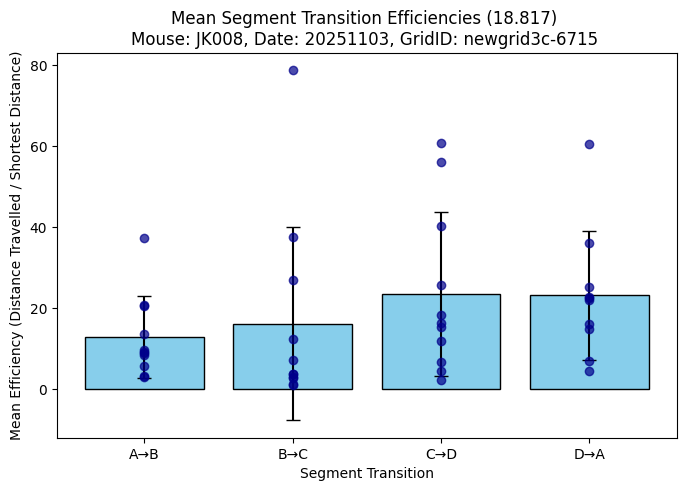

'\n'

In [ ]:
#From the table above exclude anny transtions that are not A->B, B->C, C->D, D->A
# Add the count of each transition type to the bar plot as text in each bar label


filtered_efficiency = transition_efficiency[
    transition_efficiency["transition"].isin(["A→B" , "B→C", "C→D", "D→A"])
]

#Calculate the mean of all these four efficiencies
mean_efficiency = filtered_efficiency["mean"].mean()
#print(f"Mean efficiency for A->B, B->C, C->D, D->A transitions: {mean_efficiency:.3f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

#Bar plot with error bars (std)
plt.bar(filtered_efficiency["transition"], filtered_efficiency["mean"], yerr=filtered_efficiency["std"], capsize=5, color="skyblue", edgecolor="black")

#Overlay individual data points that exist in ab_transitions, bc_transitions, cd_transitions, da_transitions
for i, row in filtered_efficiency.iterrows():
    transition = row["transition"]
    segs = summary_df[summary_df["transition"] == transition]
    plt.scatter([transition]*len(segs), segs["efficiency"], color="darkblue", alpha=0.7, zorder=10)

plt.xlabel("Segment Transition")
plt.ylabel("Mean Efficiency (Distance Travelled / Shortest Distance)")
plt.title(f"Mean Segment Transition Efficiencies ({mean_efficiency:.3f}) \nMouse: {mouse_id}, Date: {date_str}, GridID: {session_grid} ")
plt.savefig(plots_path / f"{mouse_id}_{date_str}_Segment_Transition_Efficiency_Barplot.png", dpi=300, bbox_inches="tight")
plt.show()

'''
'''


view transition efficiency plot

C:\Users\jessek\AppData\Local\Temp\ipykernel_19392\2314313130.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


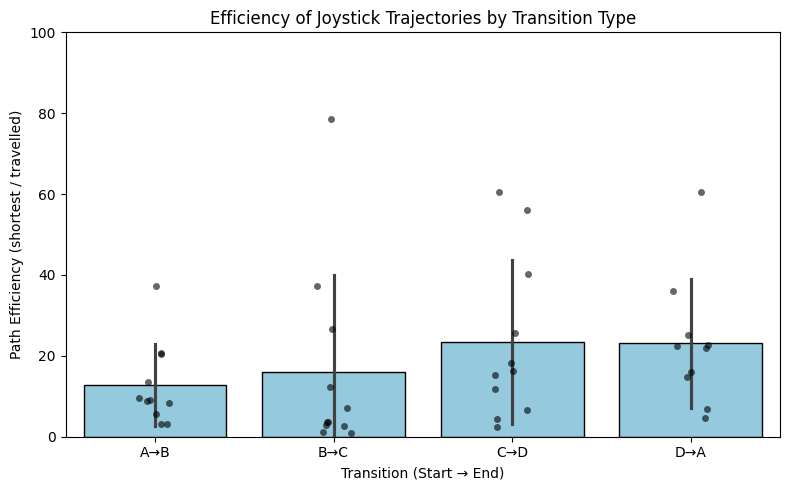

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary_df,
    x="transition",
    y="efficiency",
    estimator="mean",
    ci="sd",
    color="skyblue",
    edgecolor="black"
)

# Overlay individual segment efficiencies
sns.stripplot(
    data=summary_df,
    x="transition",
    y="efficiency",
    color="black",
    alpha=0.6,
    jitter=True
)

plt.title("Efficiency of Joystick Trajectories by Transition Type")
plt.xlabel("Transition (Start → End)")
plt.ylabel("Path Efficiency (shortest / travelled)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


get landmark axis range

In [ ]:
# --- Compute axis limits dynamically from landmark coordinates
landmark_x = [data["coords"][0] for data in landmarks.values()]
landmark_y = [data["coords"][1] for data in landmarks.values()]

x_min, x_max = min(landmark_x), max(landmark_x)
y_min, y_max = min(landmark_y), max(landmark_y)

# Add small margins (padding)
x_pad = jitter_value*2
y_pad = jitter_value*2

x_range = [x_min - x_pad, x_max + x_pad]
y_range = [y_min - y_pad, y_max + y_pad]

print(f"📊 Dynamic axis range set to:")
print(f"  X: {x_range}")
print(f"  Y: {y_range}")

📊 Dynamic axis range set to:
  X: [-6.960754051208497, 5.929754051208496]
  Y: [51.45112506103516, 62.41851125061035]


establish final lick time

In [ ]:
#print(lick_events_df.head(10))


Insert Plot segment function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import os

def plot_segment(seg_num, flip_y=True, save=True):
    """
    Plot a joystick trajectory segment between two rewards as a continuous line
    with a time-gradient (light→dark). Includes landmark dots and fixed axis limits.
    """

    # --- Validate segment index
    if seg_num < 1 or seg_num > len(segments_between_rewards):
        print(f"⚠️ Segment {seg_num} is out of range (1–{len(segments_between_rewards)})")
        return

    # --- Get segment index bounds
    s_idx, e_idx = segments_between_rewards[seg_num - 1]

    # --- Extract segment data
    segment_df = joystick_harp_lick_merged.loc[s_idx:e_idx, 
                                          ['Value.JoystickPositionX', 'Value.JoystickPositionY',  'Value.LickDetected', 'time_bin']].copy()
    segment_df['segment_time'] = segment_df['time_bin'] - segment_df['time_bin'].iloc[0]
    
    # --- Get start and end labels
    row = summary_df.loc[summary_df['segment'] == seg_num].iloc[0]
    start_label = row['landmark_start']
    end_label = row['landmark_end']
    
    # --- Gradient setup
    x = segment_df['Value.JoystickPositionX'].values
    y = segment_df['Value.JoystickPositionY'].values
    t = segment_df['segment_time'].values

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    norm = plt.Normalize(t.min(), t.max())
    cmap = plt.cm.viridis_r
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=3)
    lc.set_array(t)

    # --- Plot setup
    fig, ax = plt.subplots(figsize=(6, 6))
    line = ax.add_collection(lc)

    # --- Add trajectory start & end points
    ax.scatter(x[0], y[0], color='lime', s=100, edgecolor='black', zorder=5, label='Start')
    ax.scatter(x[-1], y[-1], color='red', s=100, edgecolor='black', zorder=5, label='End')

    # --- Overlay LickDetected locations as crosses
    lick_df = segment_df[segment_df['Value.LickDetected'] == True]
    if not lick_df.empty:
        ax.scatter(
            lick_df['Value.JoystickPositionX'],
            lick_df['Value.JoystickPositionY'],
            marker='x',
            color='black',
            s=60,
            linewidths=1.5,
            label='LickDetected',
            zorder=6
        )

        # --- Plot final lick in magenta ---
    final_lick_idx = summary_df.loc[summary_df['segment'] == seg_num, 'final_lick_idx'].values[0]

    if pd.notna(final_lick_idx):   # if segment has at least one lick
        if final_lick_idx in segment_df.index:   # final lick falls inside segment bounds
            fx = segment_df.loc[final_lick_idx, 'Value.JoystickPositionX']
            fy = segment_df.loc[final_lick_idx, 'Value.JoystickPositionY']
            ax.scatter(
                fx, fy,
                marker='x',
                color='magenta',
                s=60,
                linewidth=1.5,
                zorder=6,
                label='Final Lick'
            )

    # --- Add landmark dots if available
    if start_label in landmarks and end_label in landmarks:
        sx, sy = landmarks[start_label]["coords"]
        ex, ey = landmarks[end_label]["coords"]
        ax.scatter(sx, sy, color='gray', s=40, alpha=0.6, zorder=4)
        ax.scatter(ex, ey, color='gray', s=40, alpha=0.6, zorder=4)
    else:
        print(f"⚠️ Missing landmark coordinates for {start_label} or {end_label}")

    # --- Ensure equal aspect before setting limits
    ax.set_aspect("equal", adjustable="box")

    # --- Set fixed limits
    #ax.set_xlim(-5.5, 5)
    #ax.set_ylim(51, 61)

    # --- Set limits based on landmarks (optional)
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # --- Flip vertically if desired
    if flip_y:
        ax.invert_yaxis()
        ax.invert_xaxis()
        
    # --- Labels and title
    ax.set_xlabel("Joystick X")
    ax.set_ylabel("Joystick Y")
    ax.set_title(f"Segment {seg_num}: {start_label}→{end_label}\nMouse: {mouse_id}, Date: {date_str}")
    ax.legend(loc='lower right')

    # --- Colorbar
    cbar = plt.colorbar(line, ax=ax, label="Time in State (s)")
    cbar.ax.invert_yaxis()  # optional to match flipped Y

    # --- Save
    if save:
        plots_path = session_path.parent / "plots"
        plots_path.mkdir(exist_ok=True)
        save_name = f"{mouse_id}_{date_str}_segment{seg_num:03d}_{start_label}→{end_label}.png"
        save_path = plots_path / save_name
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"💾 Saved gradient trajectory plot for segment {seg_num} → {save_path}")

    plt.show()


plot segment by starting landmark

Found 11 segments starting at A
💾 Saved gradient trajectory plot for segment 1 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment001_A→B.png


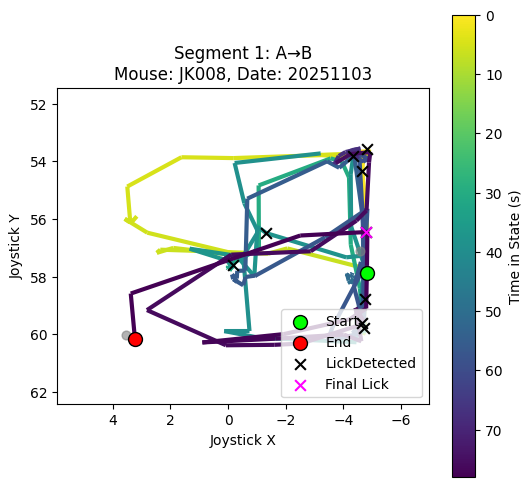

💾 Saved gradient trajectory plot for segment 5 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment005_A→B.png


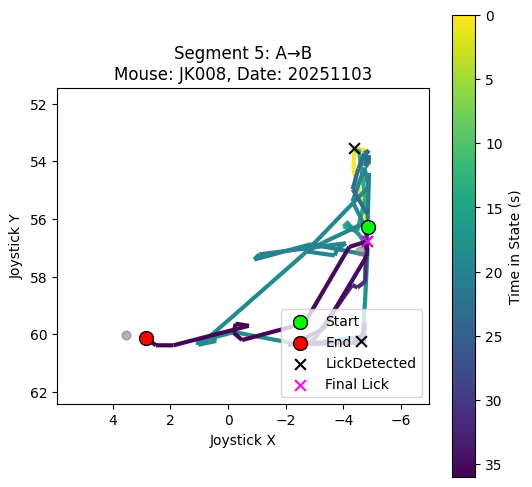

💾 Saved gradient trajectory plot for segment 9 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment009_A→B.png


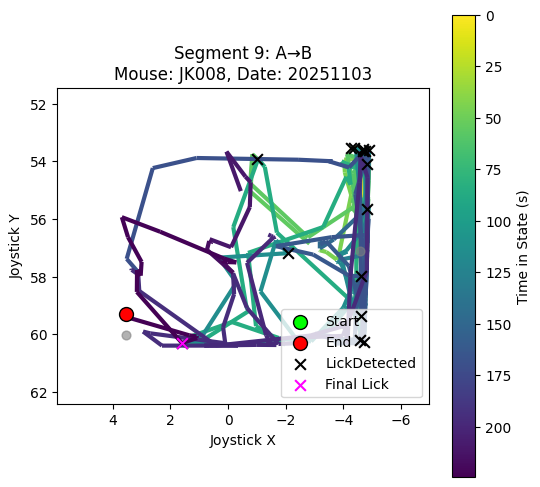

💾 Saved gradient trajectory plot for segment 13 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment013_A→B.png


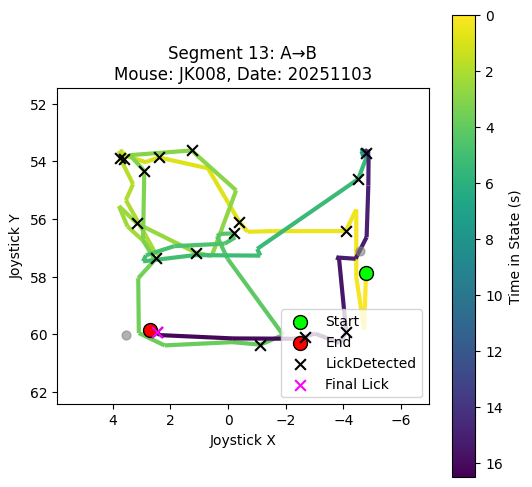

💾 Saved gradient trajectory plot for segment 17 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment017_A→B.png


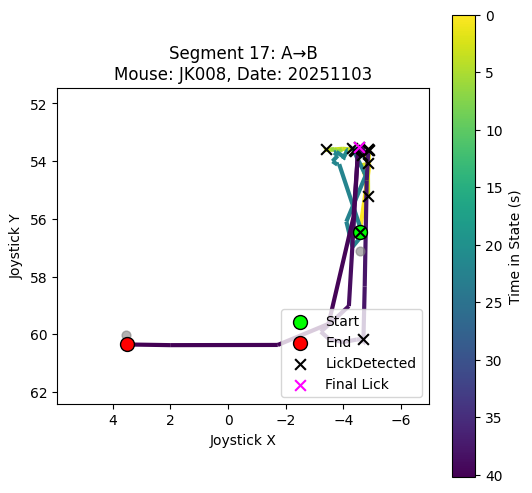

💾 Saved gradient trajectory plot for segment 21 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment021_A→B.png


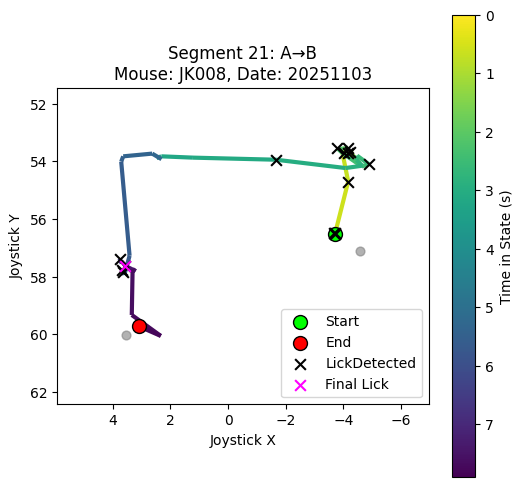

💾 Saved gradient trajectory plot for segment 25 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment025_A→B.png


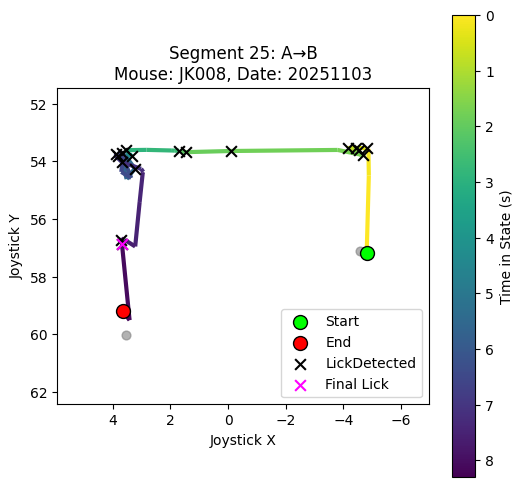

💾 Saved gradient trajectory plot for segment 29 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment029_A→B.png


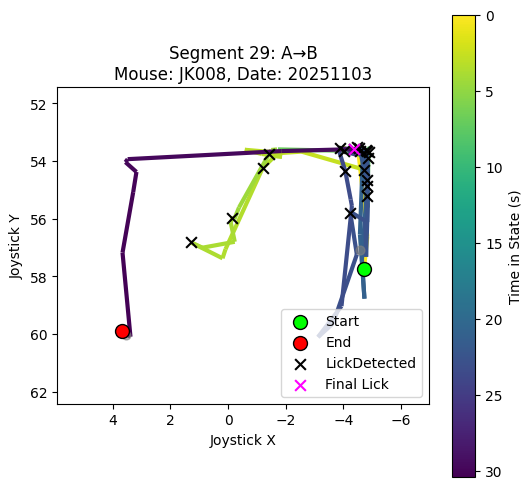

💾 Saved gradient trajectory plot for segment 33 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment033_A→B.png


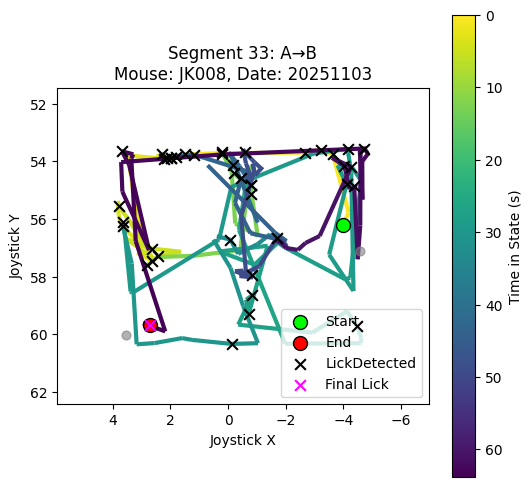

💾 Saved gradient trajectory plot for segment 37 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment037_A→B.png


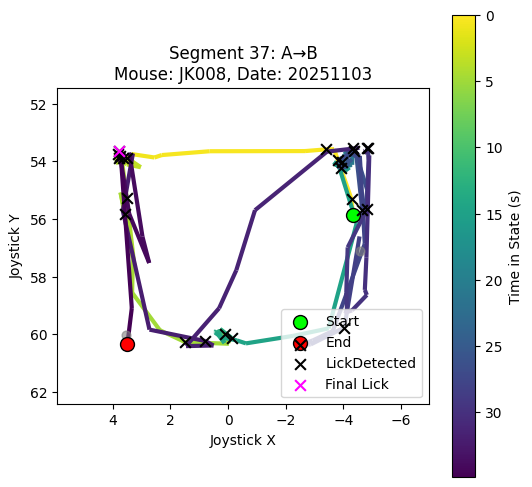

💾 Saved gradient trajectory plot for segment 41 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment041_A→B.png


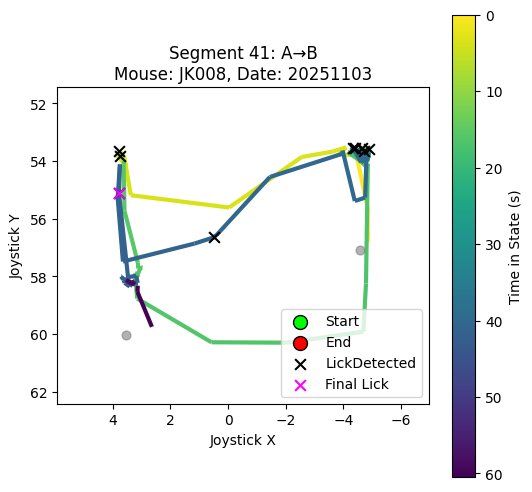

In [ ]:
target_start_label = "A"   # choose from "A", "B", "C", "D"

# Find all segments that begin at this landmark
target_segments = summary_df.query("landmark_start == @target_start_label")["segment"]

print(f"Found {len(target_segments)} segments starting at {target_start_label}")

for seg_num in target_segments:
    plot_segment(seg_num, flip_y=True, save=True)


Found 11 segments starting from B
💾 Saved gradient trajectory plot for segment 2 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment002_B→C.png


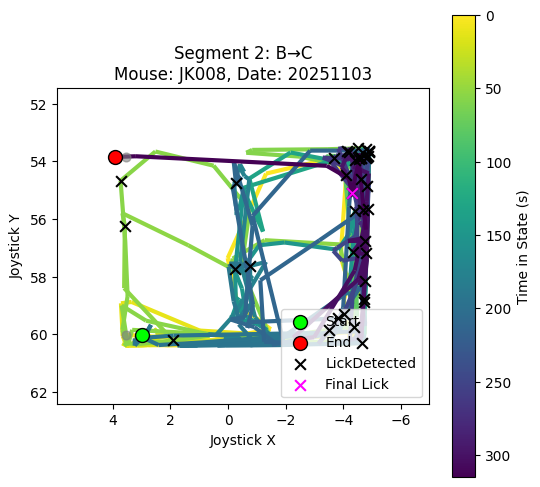

💾 Saved gradient trajectory plot for segment 6 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment006_B→C.png


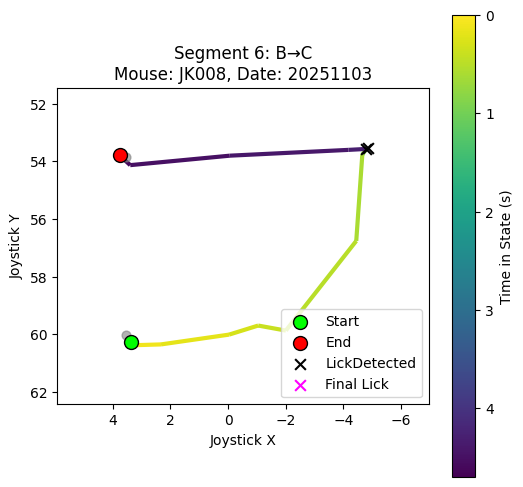

💾 Saved gradient trajectory plot for segment 10 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment010_B→C.png


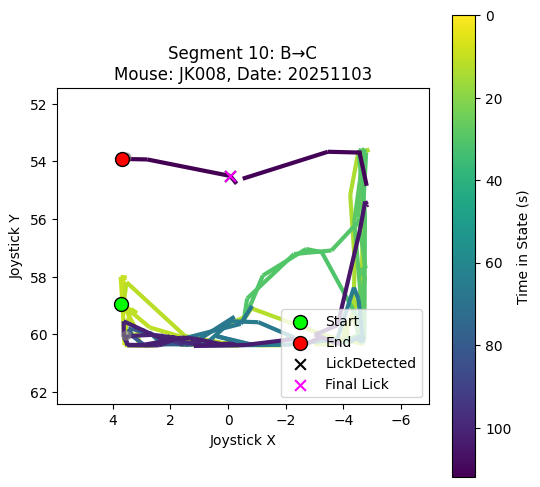

💾 Saved gradient trajectory plot for segment 14 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment014_B→C.png


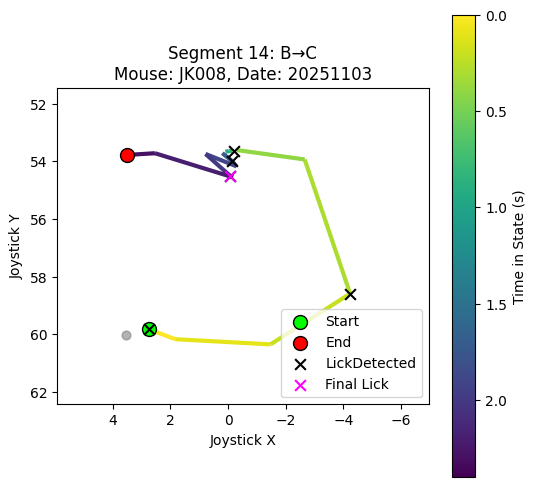

💾 Saved gradient trajectory plot for segment 18 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment018_B→C.png


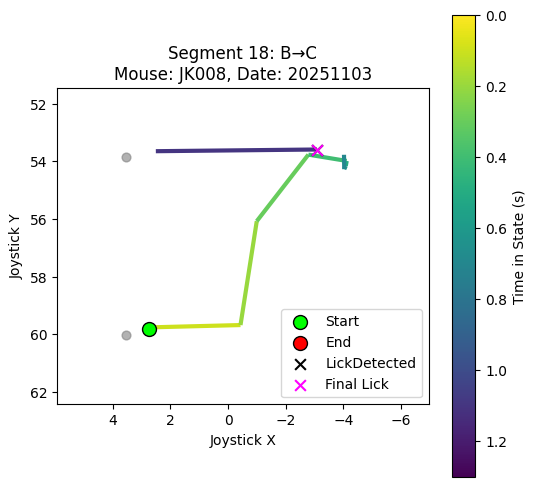

💾 Saved gradient trajectory plot for segment 22 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment022_B→C.png


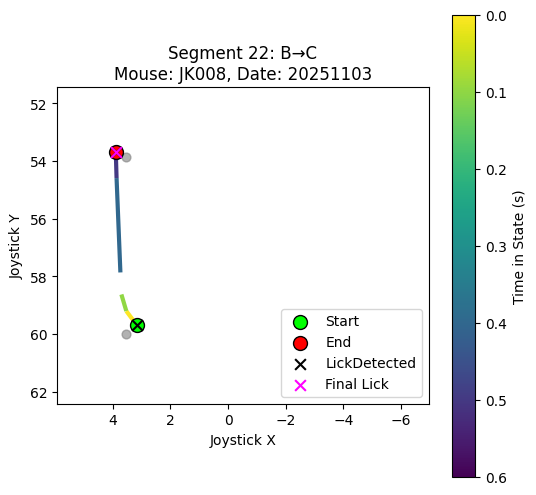

💾 Saved gradient trajectory plot for segment 26 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment026_B→C.png


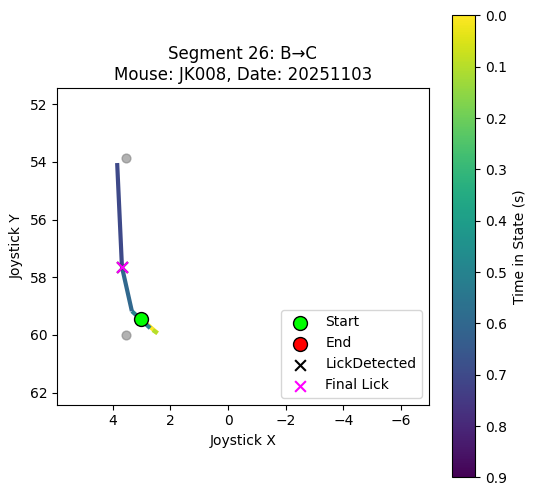

💾 Saved gradient trajectory plot for segment 30 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment030_B→C.png


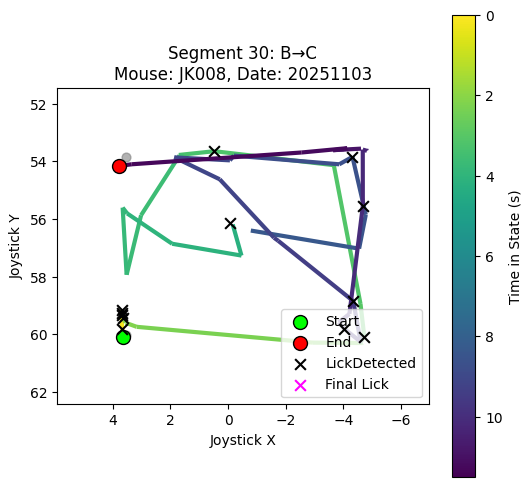

💾 Saved gradient trajectory plot for segment 34 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment034_B→C.png


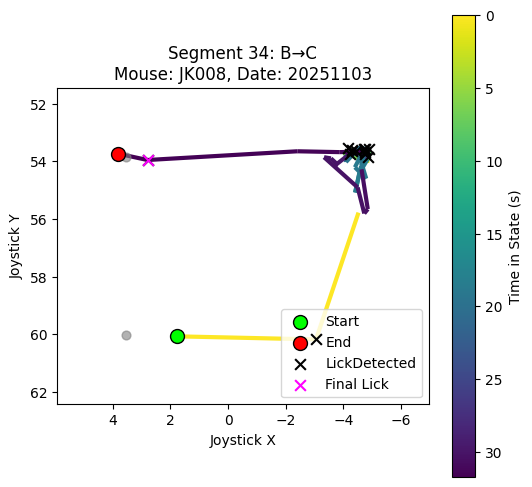

💾 Saved gradient trajectory plot for segment 38 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment038_B→C.png


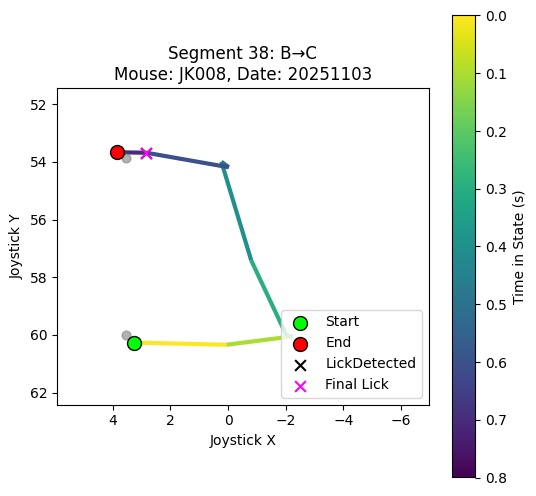

💾 Saved gradient trajectory plot for segment 42 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment042_B→C.png


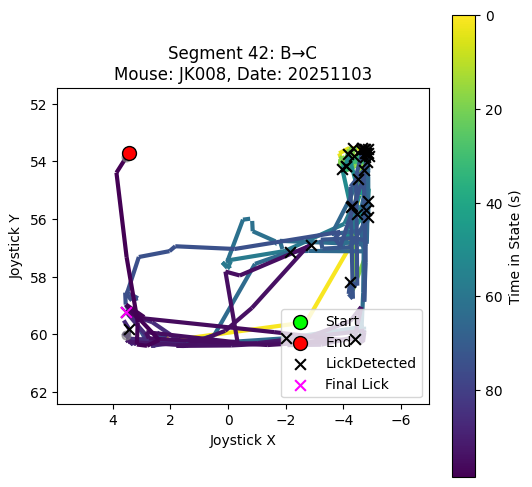

In [ ]:
target_start_label = "B"  # or any of: "A", "B", "C", "D"

# Find all segment numbers with this start label
target_segments = summary_df.query("landmark_start == @target_start_label")["segment"]

print(f"Found {len(target_segments)} segments starting from {target_start_label}")

for seg_num in target_segments:
    plot_segment(seg_num, flip_y=True, save=True)


Found 11 segments starting from C
💾 Saved gradient trajectory plot for segment 3 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment003_C→D.png


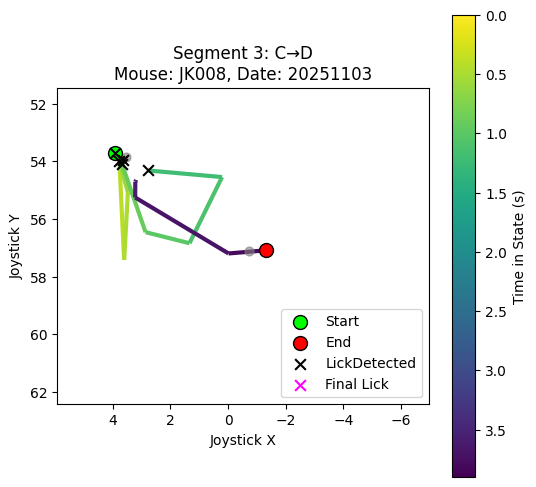

💾 Saved gradient trajectory plot for segment 7 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment007_C→D.png


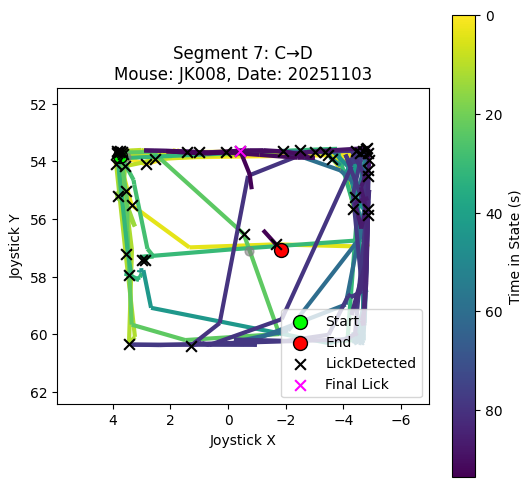

💾 Saved gradient trajectory plot for segment 11 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment011_C→D.png


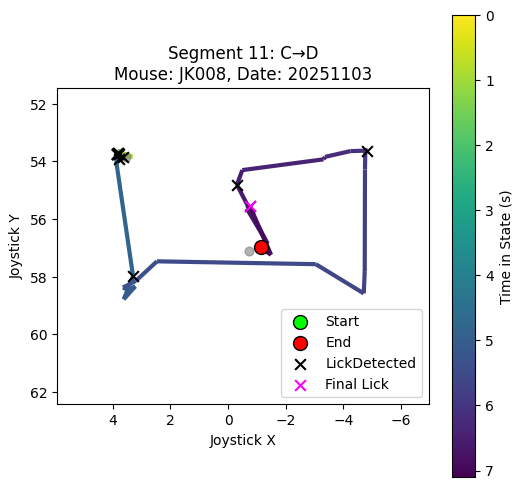

💾 Saved gradient trajectory plot for segment 15 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment015_C→D.png


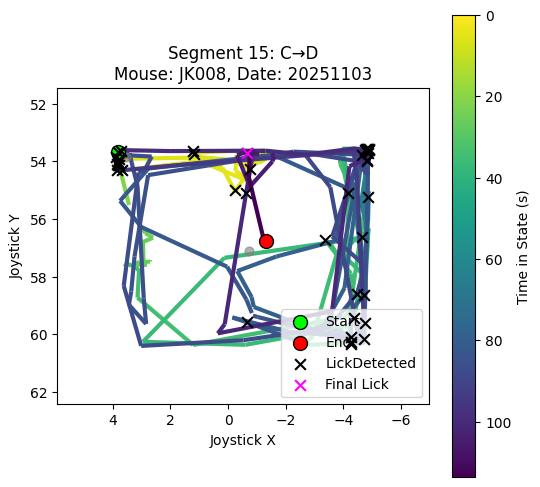

💾 Saved gradient trajectory plot for segment 19 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment019_C→D.png


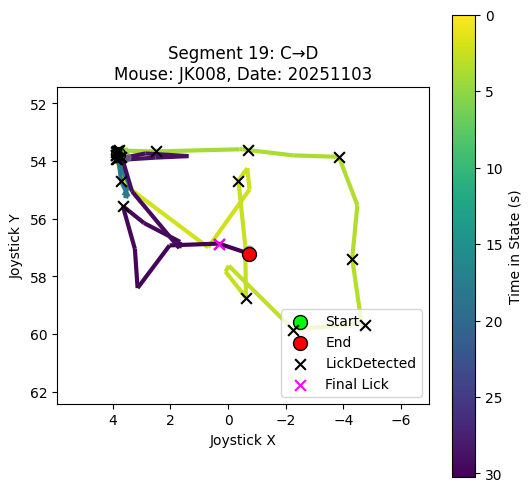

💾 Saved gradient trajectory plot for segment 23 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment023_C→D.png


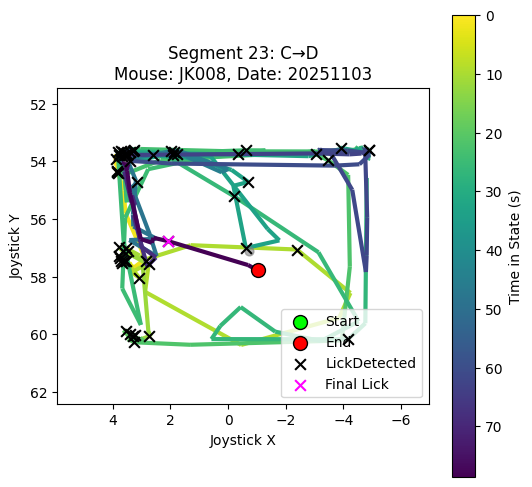

💾 Saved gradient trajectory plot for segment 27 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment027_C→D.png


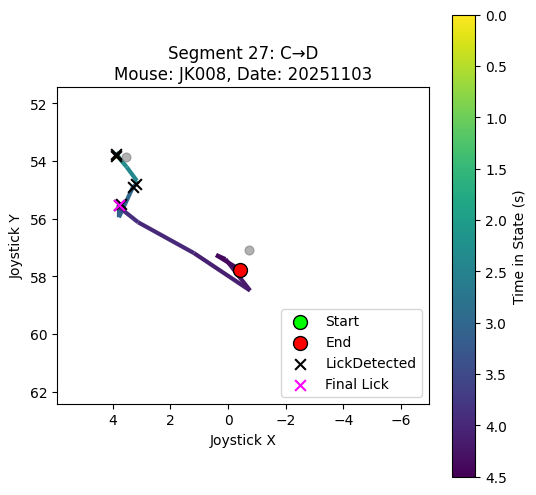

💾 Saved gradient trajectory plot for segment 31 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment031_C→D.png


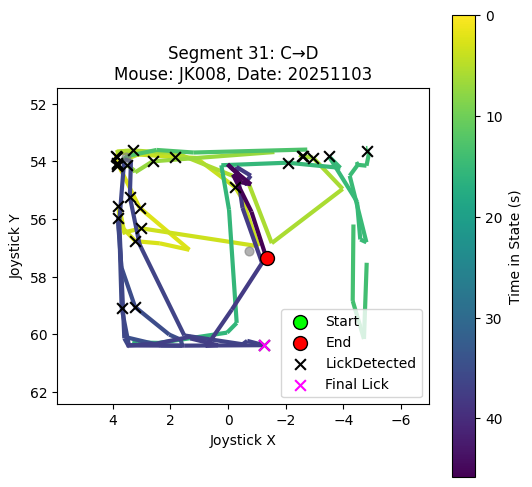

💾 Saved gradient trajectory plot for segment 35 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment035_C→D.png


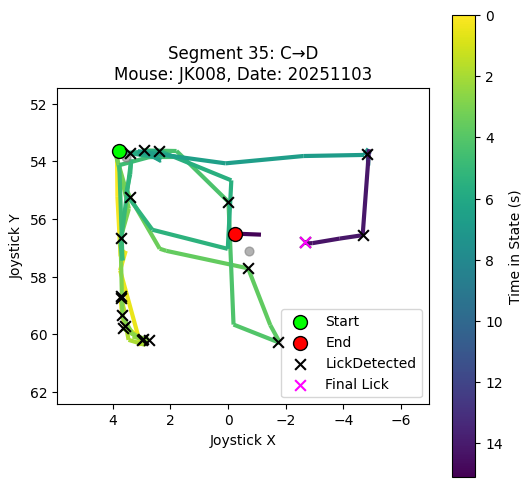

💾 Saved gradient trajectory plot for segment 39 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment039_C→D.png


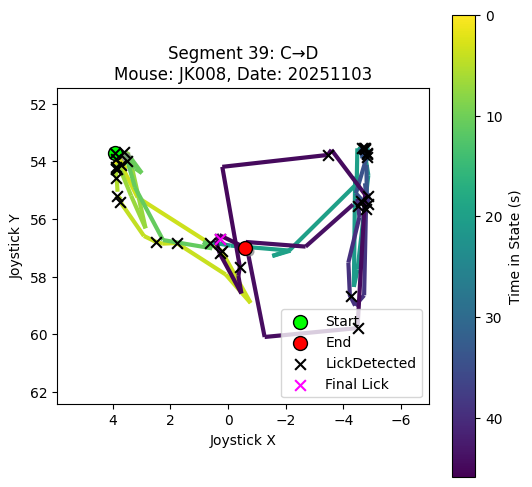

💾 Saved gradient trajectory plot for segment 43 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment043_C→D.png


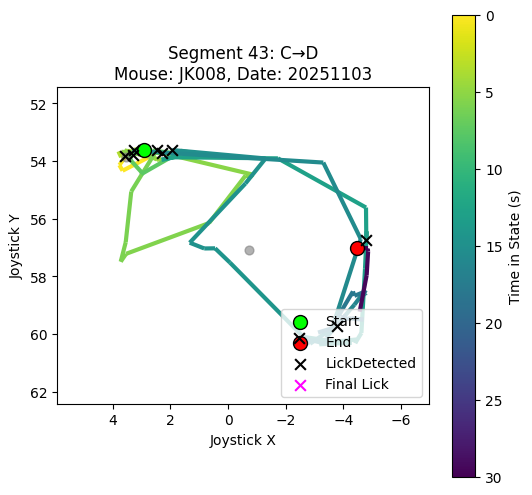

In [ ]:
target_start_label = "C"  # or any of: "A", "B", "C", "D"

# Find all segment numbers with this start label
target_segments = summary_df.query("landmark_start == @target_start_label")["segment"]

print(f"Found {len(target_segments)} segments starting from {target_start_label}")

for seg_num in target_segments:
    plot_segment(seg_num, flip_y=True, save=True)

Found 10 segments starting from D
💾 Saved gradient trajectory plot for segment 4 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment004_D→A.png


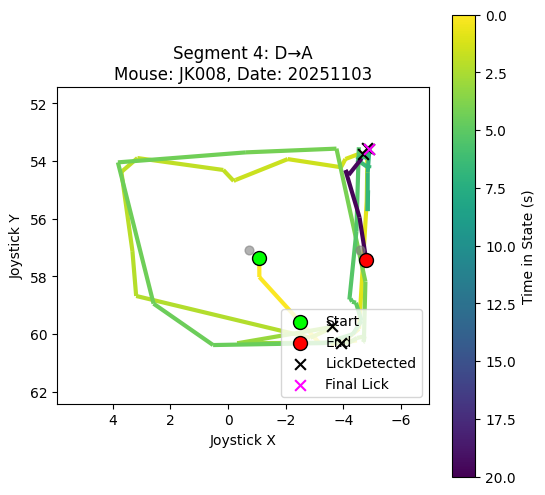

💾 Saved gradient trajectory plot for segment 8 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment008_D→A.png


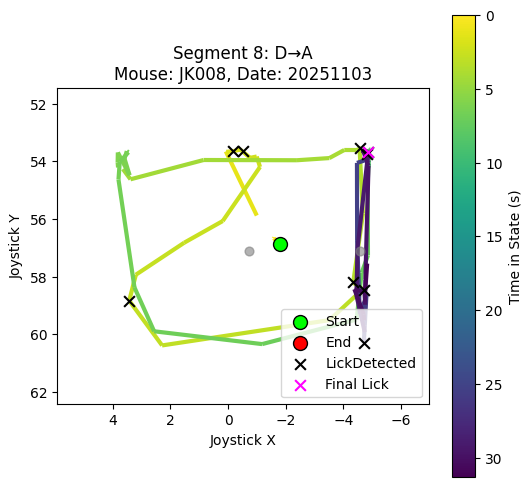

💾 Saved gradient trajectory plot for segment 12 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment012_D→A.png


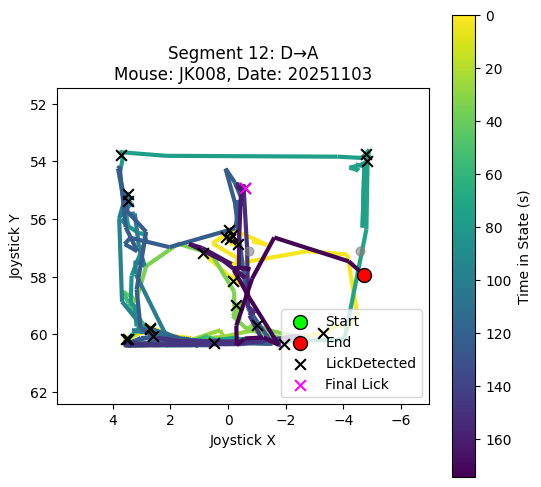

💾 Saved gradient trajectory plot for segment 16 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment016_D→A.png


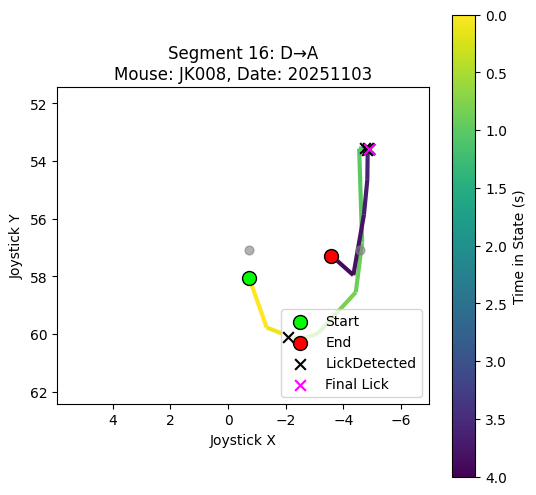

💾 Saved gradient trajectory plot for segment 20 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment020_D→A.png


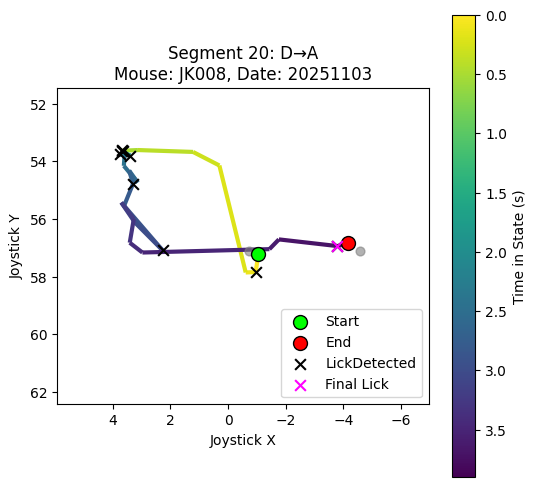

💾 Saved gradient trajectory plot for segment 24 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment024_D→A.png


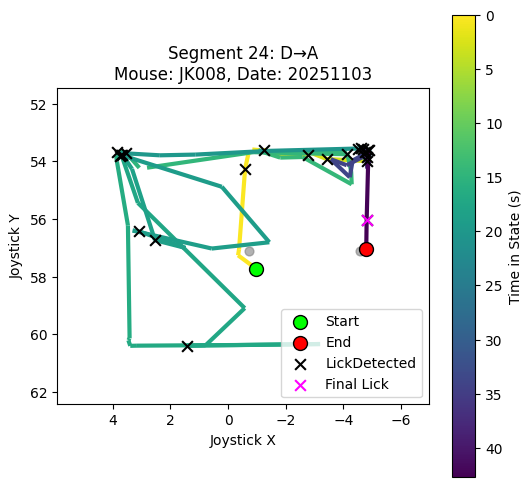

💾 Saved gradient trajectory plot for segment 28 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment028_D→A.png


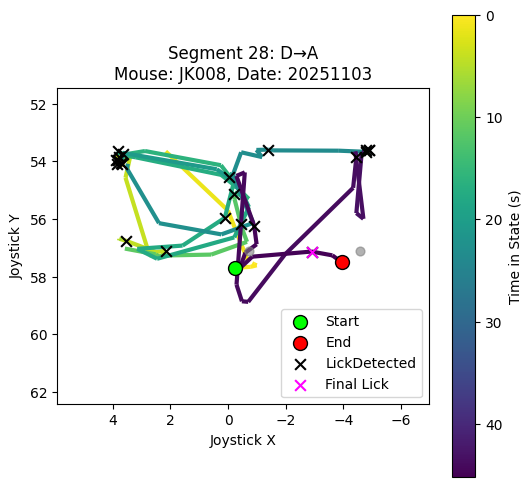

💾 Saved gradient trajectory plot for segment 32 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment032_D→A.png


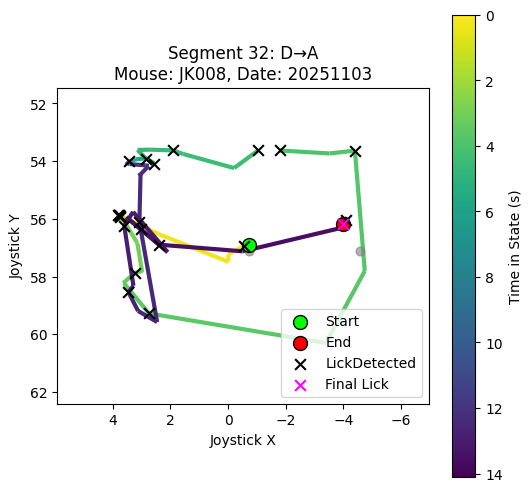

💾 Saved gradient trajectory plot for segment 36 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment036_D→A.png


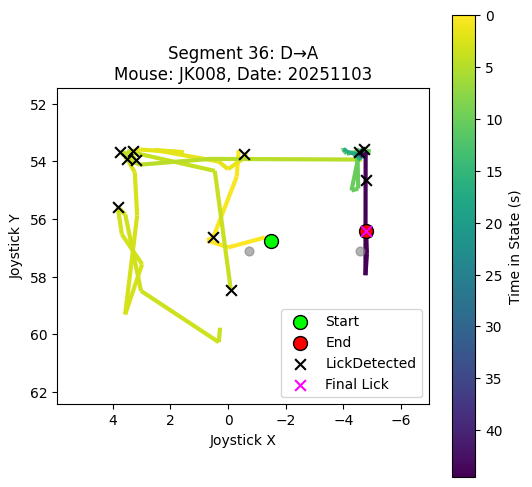

💾 Saved gradient trajectory plot for segment 40 → Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\plots\JK008_20251103_segment040_D→A.png


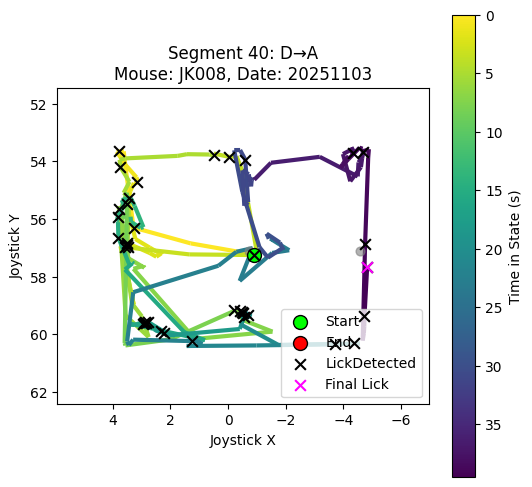

In [ ]:
target_start_label = "D"  # or any of: "A", "B", "C", "D"

# Find all segment numbers with this start label
target_segments = summary_df.query("landmark_start == @target_start_label")["segment"]

print(f"Found {len(target_segments)} segments starting from {target_start_label}")

for seg_num in target_segments:
    plot_segment(seg_num, flip_y=True, save=True)

plot segments by number in session (i.e 1st, 2nd, 3rd reward etc.)

In [ ]:
'''
# Example: plot first 3 segments
for i in range(1, min(5, len(segments_between_rewards)+1)):
#    plot_segment(i, show_points=True, colorbar=True, flip_y=True)
     plot_segment(i)
'''

'\n# Example: plot first 3 segments\nfor i in range(1, min(5, len(segments_between_rewards)+1)):\n#    plot_segment(i, show_points=True, colorbar=True, flip_y=True)\n     plot_segment(i)\n'

DEBUGGING

In [ ]:
import sys
print(sys.executable)



c:\Users\jessek\anaconda3\envs\myenv\python.exe


In [ ]:
!{sys.executable} -m pip install imageio[ffmpeg] seaborn


import matplotlib.animation as animation
print(animation.writers.list())
import seaborn
print("Seaborn version:", seaborn.__version__)


In [ ]:
!ffmpeg -version



'ffmpeg' is not recognized as an internal or external command,
operable program or batch file.


# Quanitfying path taken vs shortest path
1. Find the distance travelled in a segment
2. Identify the start and end label for that segment and the distance between them
3. Calculate the distance they travelled in a segment divided by the shortest path distance, calculated in point 2. 

In [ ]:
'''
import numpy as np

# Make a copy to be safe
df = joystick_harp_merged.copy()

# Ensure the reward column is boolean
df['OutputSet_DO2_bool'] = df['OutputSet_DO2'].fillna(False).astype(bool)

# Create a segment counter that increments each time a reward (True) appears
reward_indices = df.index[df['OutputSet_DO2_bool']].tolist()

# Initialize all as 0 (no segment)
df['segment'] = np.nan

if len(reward_indices) > 1:
    for i in range(len(reward_indices) - 1):
        start = reward_indices[i]
        end = reward_indices[i + 1]
        df.loc[start:end, 'segment'] = i + 1

# Fill any remaining NaNs before the first reward (optional)
df['segment'] = df['segment'].ffill().bfill().astype(int)

joystick_harp_merged = df  # overwrite original
print(f"✅ Added 'segment' column with {df['segment'].nunique()} unique segments.")
'''

'\nimport numpy as np\n\n# Make a copy to be safe\ndf = joystick_harp_merged.copy()\n\n# Ensure the reward column is boolean\ndf[\'OutputSet_DO2_bool\'] = df[\'OutputSet_DO2\'].fillna(False).astype(bool)\n\n# Create a segment counter that increments each time a reward (True) appears\nreward_indices = df.index[df[\'OutputSet_DO2_bool\']].tolist()\n\n# Initialize all as 0 (no segment)\ndf[\'segment\'] = np.nan\n\nif len(reward_indices) > 1:\n    for i in range(len(reward_indices) - 1):\n        start = reward_indices[i]\n        end = reward_indices[i + 1]\n        df.loc[start:end, \'segment\'] = i + 1\n\n# Fill any remaining NaNs before the first reward (optional)\ndf[\'segment\'] = df[\'segment\'].ffill().bfill().astype(int)\n\njoystick_harp_merged = df  # overwrite original\nprint(f"✅ Added \'segment\' column with {df[\'segment\'].nunique()} unique segments.")\n'

In [ ]:
print(landmarks)

{'A': {'number': 6, 'coords': (-4.560754051208496, 57.101125061035155)}, 'B': {'number': 7, 'coords': (3.529754051208496, 60.01851125061035)}, 'C': {'number': 1, 'coords': (3.529754051208496, 53.851125061035155)}, 'D': {'number': 5, 'coords': (-0.726354051208496, 57.101125061035155)}}


In [ ]:
'''
segment_labels = []
for i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):
    seg = df.loc[s_idx:e_idx]
    start_x, start_y = seg['Value.JoystickPositionX'].iloc[0], seg['Value.JoystickPositionY'].iloc[0]
    end_x, end_y = seg['Value.JoystickPositionX'].iloc[-1], seg['Value.JoystickPositionY'].iloc[-1]

    start_label = nearest_landmark(start_x, start_y, landmarks)
    end_label = nearest_landmark(end_x, end_y, landmarks)
    transition = f"{start_label}→{end_label}"

    segment_labels.append({
        "segment": i,
        "start_label": start_label,
        "end_label": end_label,
        "transition": transition
    })

segment_label_df = pd.DataFrame(segment_labels)
display(segment_label_df)
'''


'\nsegment_labels = []\nfor i, (s_idx, e_idx) in enumerate(segments_between_rewards, start=1):\n    seg = df.loc[s_idx:e_idx]\n    start_x, start_y = seg[\'Value.JoystickPositionX\'].iloc[0], seg[\'Value.JoystickPositionY\'].iloc[0]\n    end_x, end_y = seg[\'Value.JoystickPositionX\'].iloc[-1], seg[\'Value.JoystickPositionY\'].iloc[-1]\n\n    start_label = nearest_landmark(start_x, start_y, landmarks)\n    end_label = nearest_landmark(end_x, end_y, landmarks)\n    transition = f"{start_label}→{end_label}"\n\n    segment_labels.append({\n        "segment": i,\n        "start_label": start_label,\n        "end_label": end_label,\n        "transition": transition\n    })\n\nsegment_label_df = pd.DataFrame(segment_labels)\ndisplay(segment_label_df)\n'

In [ ]:
'''
target_transition = "B→C"
target_segments = segment_label_df.query("transition == @target_transition")

for seg_num in target_segments:
    plot_segment(seg_num, show_points=True, colorbar=False)
'''

'\ntarget_transition = "B→C"\ntarget_segments = segment_label_df.query("transition == @target_transition")\n\nfor seg_num in target_segments:\n    plot_segment(seg_num, show_points=True, colorbar=False)\n'

In [ ]:
'''
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm

# --- Filter to useful columns
df = joystick_harp_merged[[
    'time_bin',
    'Value.JoystickPositionX',
    'Value.JoystickPositionY',
    'OutputSet_DO2'
]].copy()

# Ensure sorted by time
df = df.sort_values('time_bin').reset_index(drop=True)

# --- Identify reward segments (continuous stretches where DO2 = True)
df['OutputSet_DO2_bool'] = df['OutputSet_DO2'].fillna(False).astype(bool)
df['DO2_shift'] = df['OutputSet_DO2_bool'].astype(int).diff().fillna(0)

reward_segments = []
in_segment = False
start_idx = None

for i, row in df.iterrows():
    if not in_segment and row['OutputSet_DO2']:
        # Start of new reward segment
        start_idx = i
        in_segment = True
    elif in_segment and not row['OutputSet_DO2']:
        # End of segment
        reward_segments.append((start_idx, i - 1))
        in_segment = False

# Handle if last segment goes to end of data
if in_segment:
    reward_segments.append((start_idx, len(df) - 1))

print(f"✅ Found {len(reward_segments)} reward segments.")

# --- Create trajectory plots
plots_path = session_path.parent / "plots"
plots_path.mkdir(exist_ok=True)

for seg_num, (start_idx, end_idx) in enumerate(reward_segments, start=1):
    seg = df.iloc[start_idx:end_idx + 1]
    x = seg['Value.JoystickPositionX'].values
    y = seg['Value.JoystickPositionY'].values

    if len(seg) < 2:
        continue  # skip too short segments

    # Create a colormap along the trajectory
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    norm = plt.Normalize(seg['time_bin'].min(), seg['time_bin'].max())
    lc = LineCollection(segments, cmap='plasma', norm=norm)
    lc.set_array(seg['time_bin'].values)
    lc.set_linewidth(2.5)

    # --- Plot
    plt.figure(figsize=(6, 6), facecolor='white')
    plt.gca().add_collection(lc)
    plt.scatter(x[0], y[0], color='green', s=60, label='Start')
    plt.scatter(x[-1], y[-1], color='red', s=60, label='End')

    plt.xlabel("Joystick X")
    plt.ylabel("Joystick Y")
    plt.title(f"Trajectory {seg_num}\n(OutputSet_DO2 True: {len(seg)} bins)")
    plt.axis("equal")
    plt.legend()

    # optional: consistent range across all plots
    x_min, x_max = df["Value.JoystickPositionX"].min(), df["Value.JoystickPositionX"].max()
    y_min, y_max = df["Value.JoystickPositionY"].min(), df["Value.JoystickPositionY"].max()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Save plot
    save_path = plots_path / f"{mouse_id}_{date_str}_{session_grid}_trajectory_{seg_num:03d}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.close()

    print(f"🎨 Saved trajectory plot {seg_num} to {save_path}")
    '''


'\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom matplotlib.collections import LineCollection\nfrom matplotlib import cm\n\n# --- Filter to useful columns\ndf = joystick_harp_merged[[\n    \'time_bin\',\n    \'Value.JoystickPositionX\',\n    \'Value.JoystickPositionY\',\n    \'OutputSet_DO2\'\n]].copy()\n\n# Ensure sorted by time\ndf = df.sort_values(\'time_bin\').reset_index(drop=True)\n\n# --- Identify reward segments (continuous stretches where DO2 = True)\ndf[\'OutputSet_DO2_bool\'] = df[\'OutputSet_DO2\'].fillna(False).astype(bool)\ndf[\'DO2_shift\'] = df[\'OutputSet_DO2_bool\'].astype(int).diff().fillna(0)\n\nreward_segments = []\nin_segment = False\nstart_idx = None\n\nfor i, row in df.iterrows():\n    if not in_segment and row[\'OutputSet_DO2\']:\n        # Start of new reward segment\n        start_idx = i\n        in_segment = True\n    elif in_segment and not row[\'OutputSet_DO2\']:\n        # End of segment\n        reward_segments.append((start_idx, i - 1))\n  

In [ ]:
'''
n = 5  # first reward segment
start_idx, end_idx = reward_segments[n-1]
segment_df = df.iloc[start_idx:end_idx+1]

# View the first few rows
display(segment_df.head(10))

'''


'\nn = 5  # first reward segment\nstart_idx, end_idx = reward_segments[n-1]\nsegment_df = df.iloc[start_idx:end_idx+1]\n\n# View the first few rows\ndisplay(segment_df.head(10))\n\n'

# EXTRA PLOTTING IDEAS

In [ ]:
'''
### View session hit count

# --- Count number of True values in OutputSet_DO2
import pandas as pd
from pathlib import Path

# Define path to the OutputSet.csv file
outputset_path = Path(r"Z:\public\projects\JeKr_130524_Joystick\rotary-encoder\bonsai_joystick_data\JK_008\bestsessions\ses-001_date-20251016T135714\Deserialised\OutputSet.csv")

# Load the CSV
df = pd.read_csv(outputset_path)

# Check what the column names are (in case prefixes exist)
print("Columns found:", df.columns.tolist())

# --- Find the correct column (robust detection)
do2_col = next((col for col in df.columns if "OutputSet_DO2" in col), None)
if do2_col is None:
    raise ValueError("❌ No column found containing 'OutputSet_DO2'!")

# --- Convert to boolean safely and count
true_count = df[do2_col].astype(str).str.lower().eq("true").sum()

print(f"✅ Hit Count (OutputSet_DO2 == True): {true_count}")
'''


'\n### View session hit count\n\n# --- Count number of True values in OutputSet_DO2\nimport pandas as pd\nfrom pathlib import Path\n\n# Define path to the OutputSet.csv file\noutputset_path = Path(r"Z:\\public\\projects\\JeKr_130524_Joystick\rotary-encoder\x08onsai_joystick_data\\JK_008\x08estsessions\\ses-001_date-20251016T135714\\Deserialised\\OutputSet.csv")\n\n# Load the CSV\ndf = pd.read_csv(outputset_path)\n\n# Check what the column names are (in case prefixes exist)\nprint("Columns found:", df.columns.tolist())\n\n# --- Find the correct column (robust detection)\ndo2_col = next((col for col in df.columns if "OutputSet_DO2" in col), None)\nif do2_col is None:\n    raise ValueError("❌ No column found containing \'OutputSet_DO2\'!")\n\n# --- Convert to boolean safely and count\ntrue_count = df[do2_col].astype(str).str.lower().eq("true").sum()\n\nprint(f"✅ Hit Count (OutputSet_DO2 == True): {true_count}")\n'

## Quantify total distance moved in a session
## Create heatmaps within sessions that look at specifically when navigating from landmark to landmark i.e from A->B, where does mouse spend its time in this period
## 

## Step 6 - Produce heatmap by seconds

## Step 7 - Produce heatmap that shows location of the joystick at different points in session 

## Step 8 - Quantify number of licks before correct landmark licked 

## Step 9 - For each rewarded landmark, how many incorrect licks were performed before the correct lick

## Step 10 - How many locations visisted before the correct one, per reward landmark per trial. See how this changes throughout the session
initally they are trialling 6 landmakrs before reaching the rewarded one whereas by the end they trial 2 